In [1]:
#!pip install pdpbox
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline


from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
path="../../data/"

In [2]:
from utils import *
from MLModels import *
from DataProcessing import *

In [3]:

config = dict(scale_pos_weight = 1,subsample = 0.8, min_child_weight = 5, max_depth = 5, gamma= 2, 
              colsample_bytree= 0.6,smote=1)

mod_xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bynode=1, learning_rate=0.1,
           max_delta_step=0,  missing=None,
           n_estimators=60, n_jobs=4, nthread=4, objective='binary:logistic',
           random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=config['scale_pos_weight'],
           min_child_weight=config['min_child_weight'],
           gamma=config['gamma'], colsample_bytree=config['colsample_bytree'],max_depth=config['max_depth'],
           seed=42, silent=None, subsample=1, verbosity=1)

In [4]:

drpvars1='AD|hospital_episode_type_f41231_General\
|spells_in_hospital_f41235|sexual_partners|using_computer|interpolated_year|\
genotype_measurement_batch_f2200|\
f21052|f2188|f20463|coeliac|Unknown|death|APOE4|consultant|f20434|year_of_birth|age|set|\
history_of_psychiatric|carer_support|sunlamp|answered_sexual|samesex|death'

drpvars1='AD|Unknown|answered_sexual_history_questions|speciality_of_consultant|APOE4|\
hospital_episode_type|history_of_psychiatric|samesex|year_of_birth|age'


drpvarsapoe='AD|hospital_episode_type_f41231_General\
|spells_in_hospital_f41235|sexual_partners|using_computer|interpolated_year|\
genotype_measurement_batch_f2200|\
f21052|f2188|f20463|coeliac|Unknown|death|APOE4|consultant|f20434|year_of_birth|age|set|APOE|Genotype'

drpvarsapoe='AD|Unknown|answered_sexual_history_questions|speciality_of_consultant|APOE4|\
hospital_episode_type|history_of_psychiatric|samesex|year_of_birth|Genotype|age'


drvarsdef=['DIAB','DIAB_bef','CERVASC','CERVASC_bef','PD','CERVASC','EPIL']

drpvarssurv='AD|DIAB|EPIL|CERVASC_bef|spells_in_hospital_f41235|\
hospital_episode_type_f41231_General episode|genotype_measurement_batch_f2200|consultant\
|Unknown|Not at all'

genos=[
 'Genotype_e1/e4',
 'Genotype_e2/e2',
 'Genotype_e2/e3',
 'Genotype_e2/e4',
 'Genotype_e3/e3',
 'Genotype_e3/e4',
 'Genotype_e4/e4']

genotypes=['Genotype_e1/e2',"Genotype_e2/e2","Genotype_e2/e3","Genotype_e3/e3","Genotype_e2/e4","Genotype_e1/e4",
          "Genotype_e3/e4","Genotype_e4/e4"]

gen_lkup={'Genotype_e2/e2':1,"Genotype_e1/e2":2,"Genotype_e2/e3":3,"Genotype_e3/e3":4,
          "Genotype_e2/e4":5,"Genotype_e1/e4":6,"Genotype_e3/e4":7,"Genotype_e4/e4":8}

gen_lkup_rev={1:'Genotype_e2/e2',2:"Genotype_e1/e2",3:"Genotype_e2/e3",4:"Genotype_e3/e3",
          5:"Genotype_e2/e4",6:"Genotype_e1/e4",7:"Genotype_e3/e4",8:"Genotype_e4/e4"}

def int_vars(df,var1,vars=genos):
    for var in vars:
        df[str(var1)+" "+var]=df[var]*df[var1]
    return df
#E2/e2, e2/e3,e3/e3,e3/e4,e4/e4

config = dict(scale_pos_weight = 1,max_depth=3,smote=1)



In [15]:
AD_model_full=pd.read_pickle('%s%s' % (path,'AD_model_full70.p'))
AD_model_full=pd.read_pickle('%s%s' % (path,'AD_model_full.p'))



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0



Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


4018
8036
12054
16072
20090
24108
28126
32144
36162
Accuracy : 0.7237
19753.0
AUC Score (Train): 0.796992


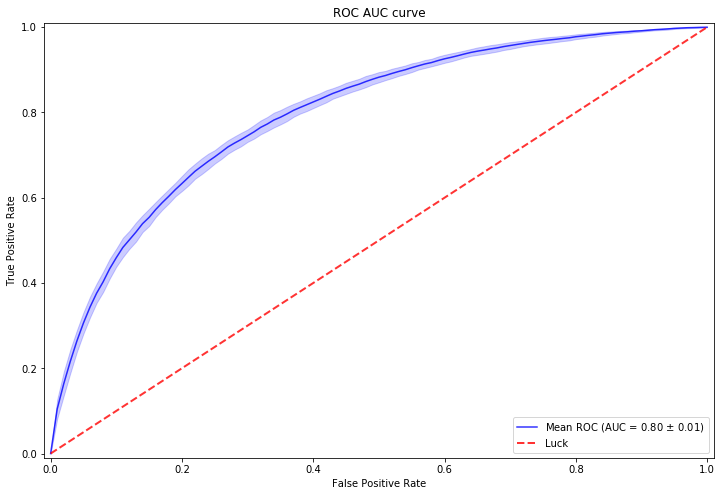

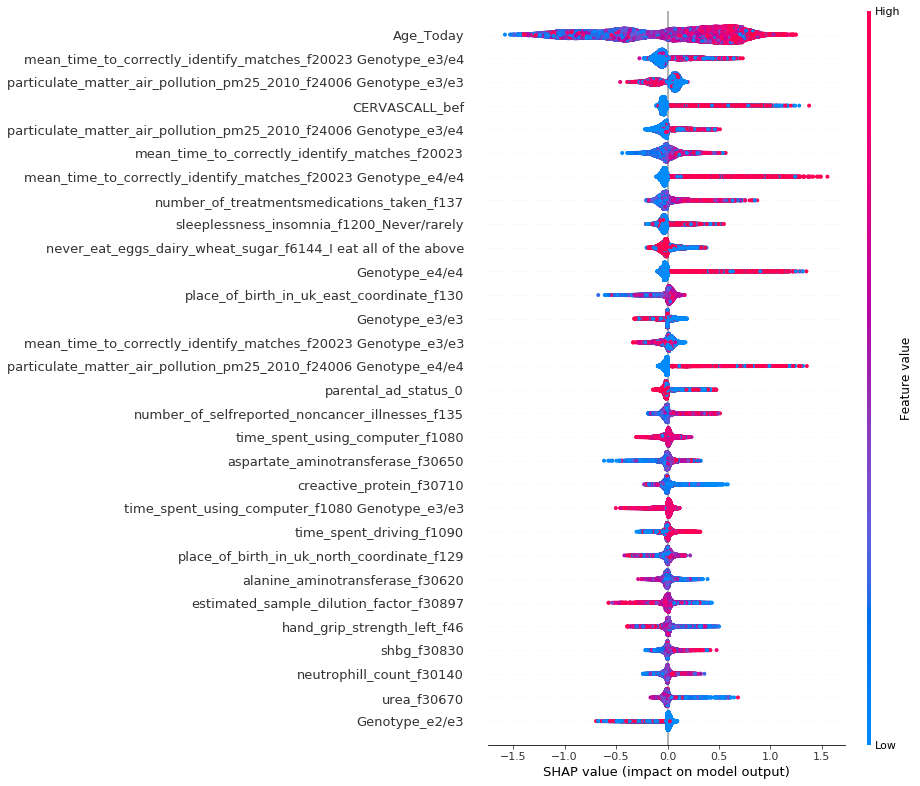

In [14]:
AD_model_full['AD'].value_counts()
dropvars_full=varstodrop(AD_model_full,drpvars1,drvarsdef)
#AD_model_full=replace_genotype(AD_model_full,gen_lkup,genotypes)
AD_model_full=replacenullsmean(AD_model_full)
AD_model_full=col_spec_chars(AD_model_full)
#AD_model_full=int_vars(AD_model_full,'Age_Today',genos)
#AD_model_full=int_vars(AD_model_full,'CERVASCALL_bef',genos)
# create dropvars
dropvars_full=varstodrop(AD_model_full,drpvars1,drvarsdef)
#dropvars_full=varstodrop(AD_model_full,'AD',drvarsdef)

shapsum=newmodelrun(AD_model_full,dropvars=dropvars_full,model=mod_xgb,depvar='AD',reps=10,splits=2,rebalance=1)
#

In [ ]:
AD_model_full['AD'].value_counts()
dropvars_full=varstodrop(AD_model_full,drpvars1,drvarsdef)
#AD_model_full=replace_genotype(AD_model_full,gen_lkup,genotypes)
AD_model_full=replacenullsmean(AD_model_full)
AD_model_full=col_spec_chars(AD_model_full)
#AD_model_full=int_vars(AD_model_full,'Age_Today',genos)
#AD_model_full=int_vars(AD_model_full,'CERVASCALL_bef',genos)
# create dropvars
dropvars_full=varstodrop(AD_model_full,drpvars1,drvarsdef)
#dropvars_full=varstodrop(AD_model_full,'AD',drvarsdef)

shapsum=newmodelrun(AD_model_full,dropvars=dropvars_full,model=mod_xgb,depvar='AD',reps=5,splits=5,rebalance=0)
#


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
int_var_set=['sleeplessness_insomnia_f1200_Never/rarely','CERVASCALL_bef',
             'mean_time_to_correctly_identify_matches_f20023',
            'number_of_treatmentsmedications_taken_f137','particulate_matter_air_pollution_pm25_2010_f24006',
            'time_spent_using_computer_f1080']

for var_1 in int_var_set:
    AD_model_full_ints=int_vars(AD_model_full,var_1,vars=genos)

Accuracy : 0.9904
0.0
AUC Score (Train): 0.803935


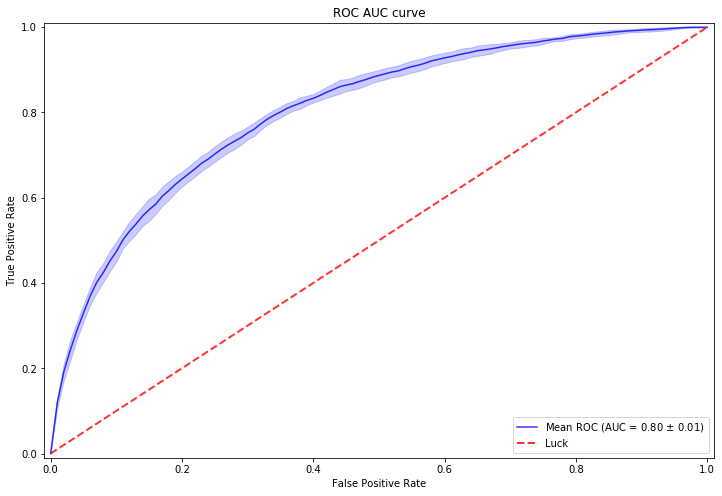

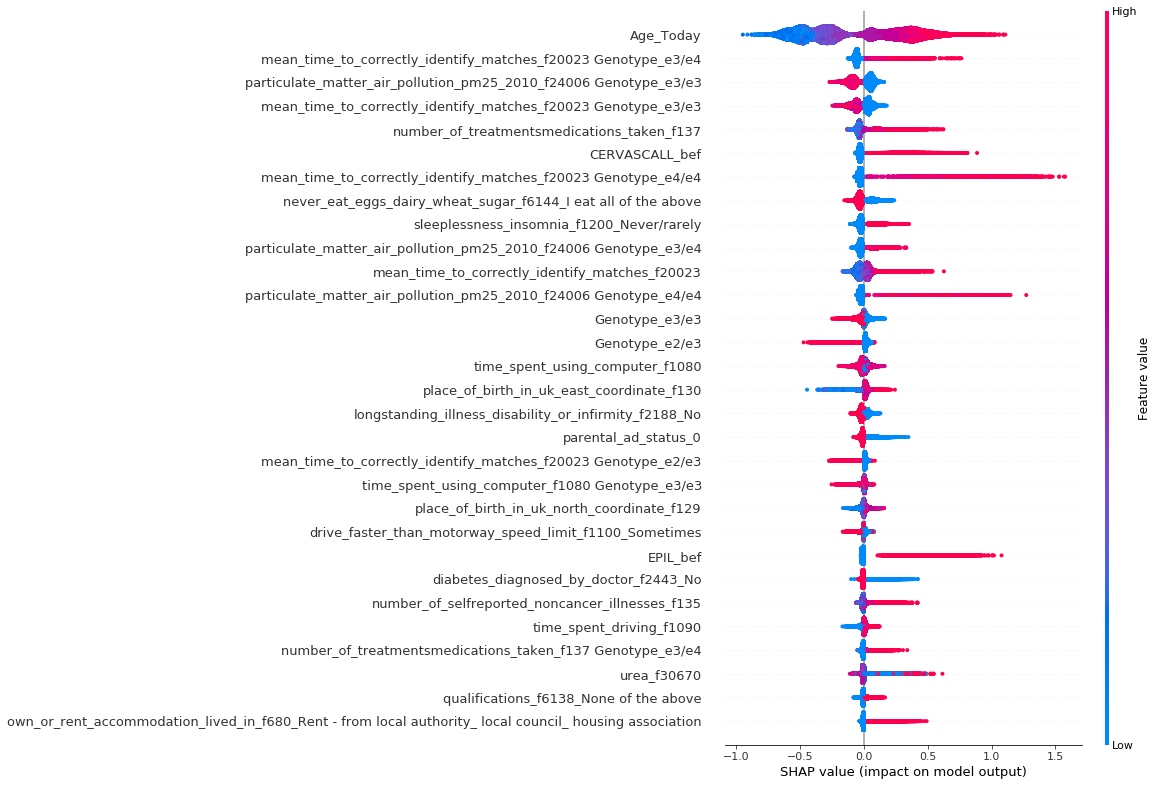

In [13]:
AD_model_full['AD'].value_counts()
dropvars_full=varstodrop(AD_model_full,drpvars1,drvarsdef)
#AD_model_full=replace_genotype(AD_model_full,gen_lkup,genotypes)
AD_model_full=replacenullsmean(AD_model_full)
AD_model_full=col_spec_chars(AD_model_full)
#AD_model_full=int_vars(AD_model_full,'Age_Today',genos)
#AD_model_full=int_vars(AD_model_full,'CERVASCALL_bef',genos)
# create dropvars
dropvars_full=varstodrop(AD_model_full,drpvars1,drvarsdef)
#dropvars_full=varstodrop(AD_model_full,'AD',drvarsdef)

shapsum=newmodelrun(AD_model_full,dropvars=dropvars_full,model=mod_xgb,depvar='AD',reps=2,splits=5,rebalance=0)
#models_out=kfoldvalidation(X,y,model,splits=5)

Accuracy : 0.9856
1.0
AUC Score (Train): 0.773266


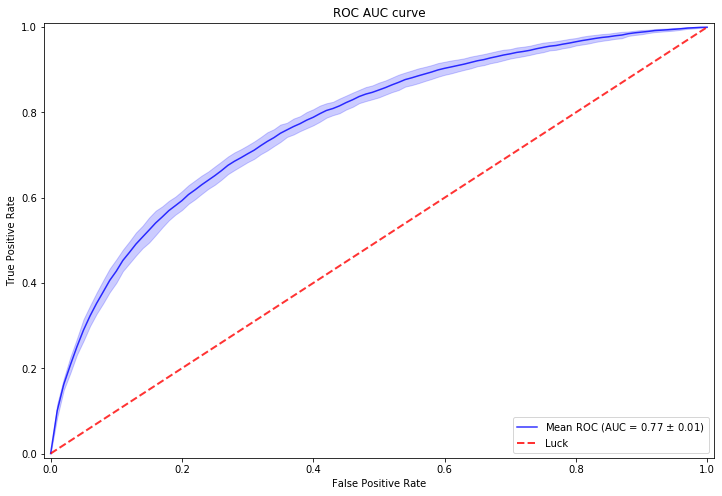

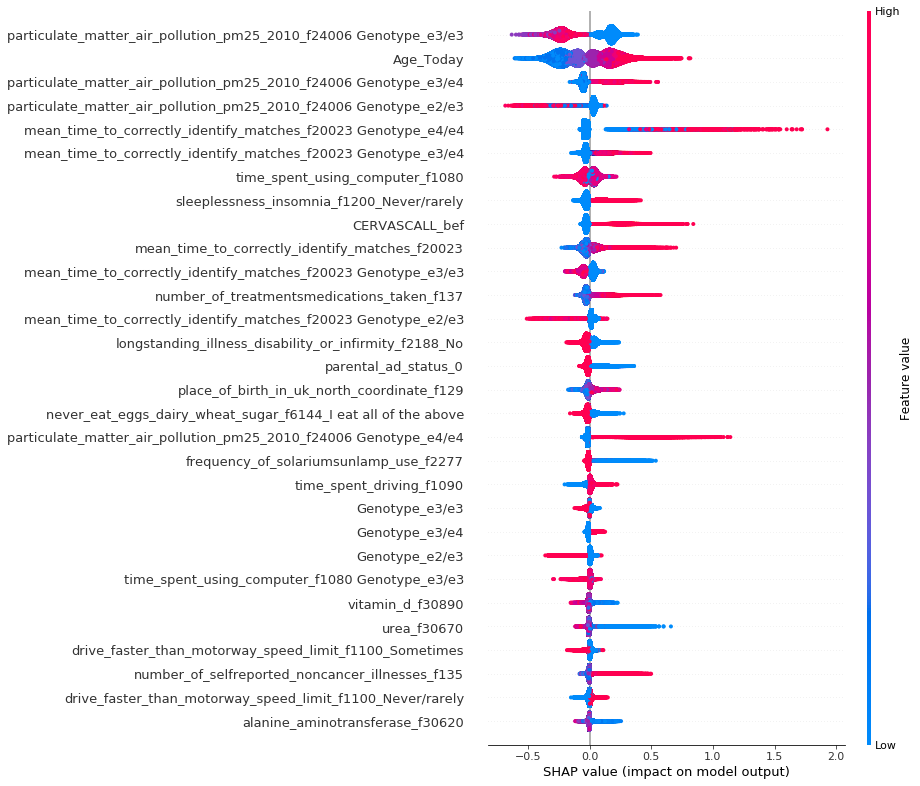

In [8]:
shapsum=newmodelrun(AD_model_full,dropvars=dropvars_full,model=mod_xgb,depvar='AD',reps=5,splits=5,rebalance=0)



Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


Accuracy : 0.6891
1559.0
AUC Score (Train): 0.752769


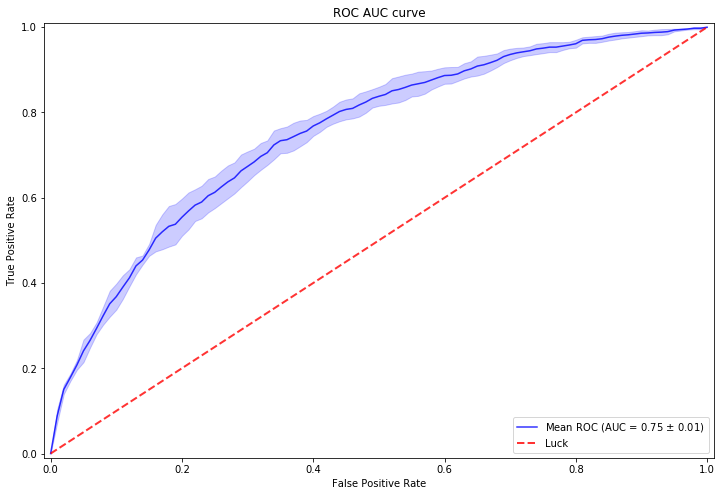

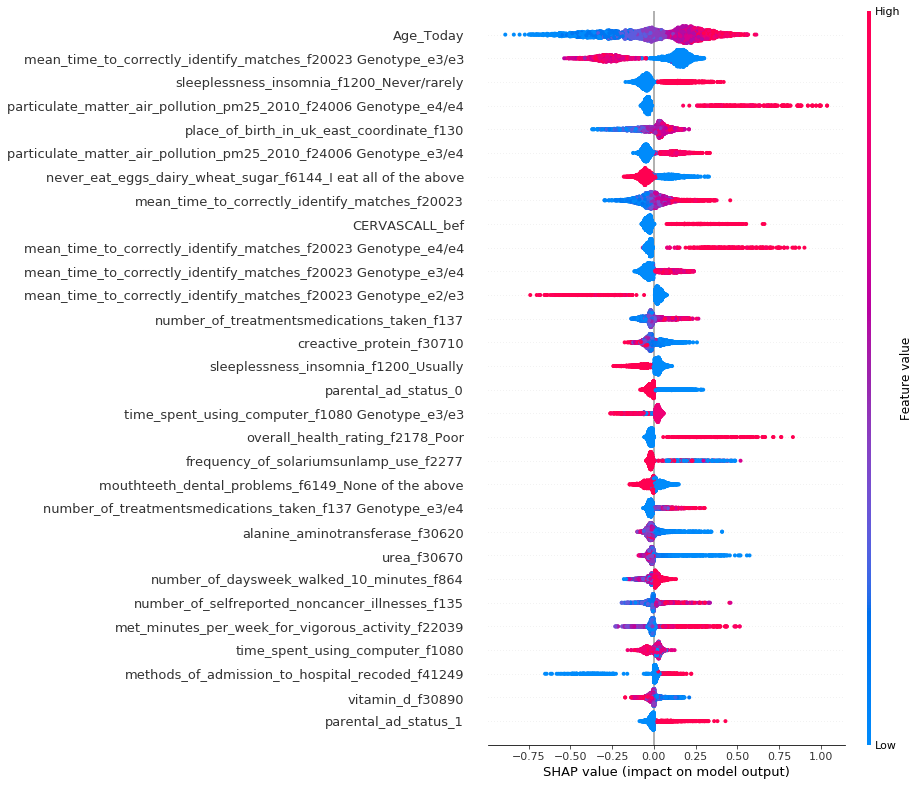


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


Accuracy : 0.6885
1599.0
AUC Score (Train): 0.754450


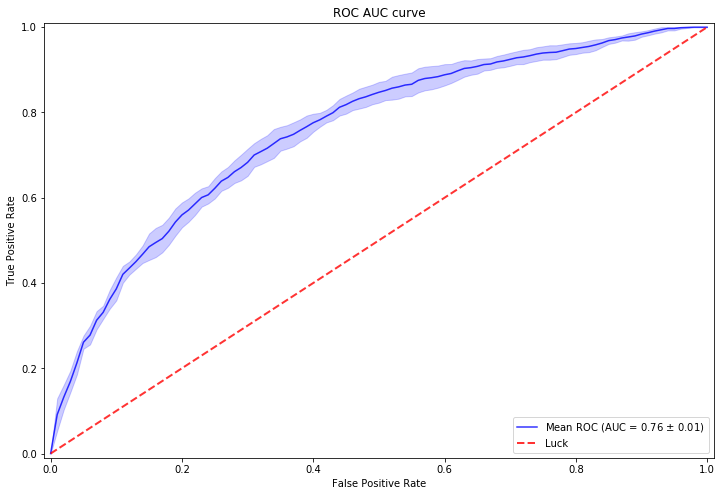

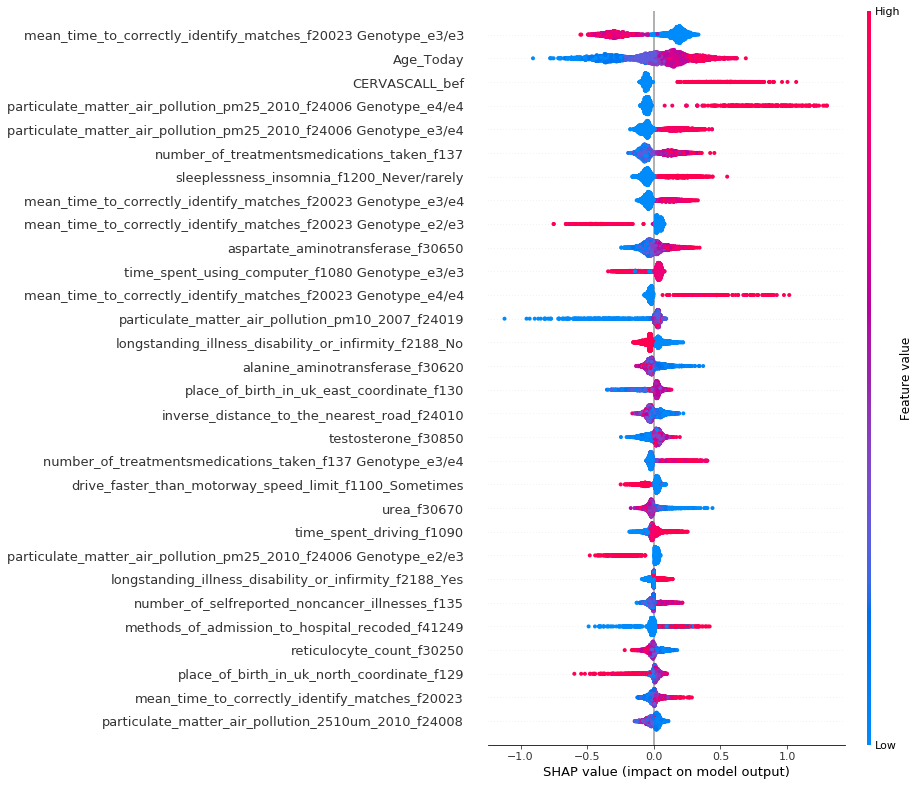


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


Accuracy : 0.7109
1578.0
AUC Score (Train): 0.773107


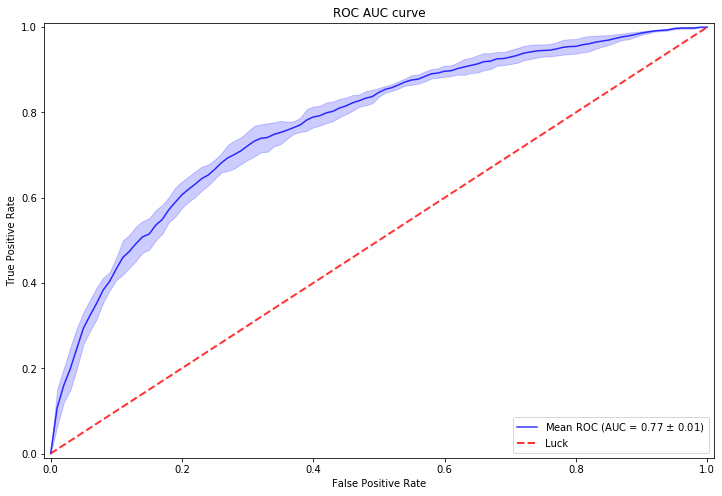

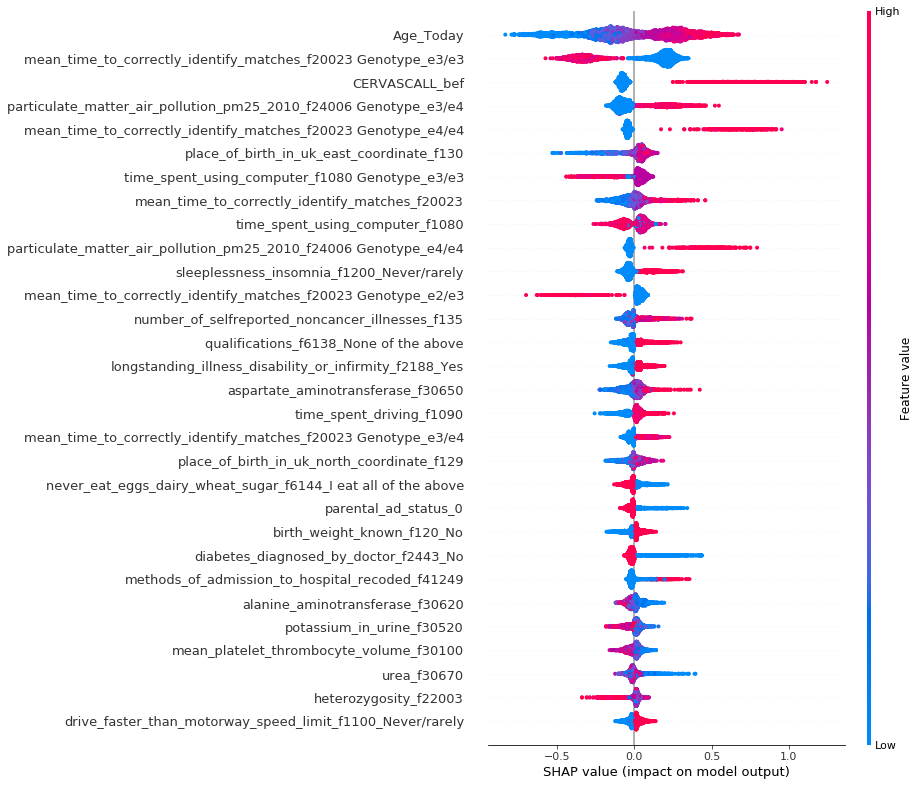


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


Accuracy : 0.6953
1593.0
AUC Score (Train): 0.765708


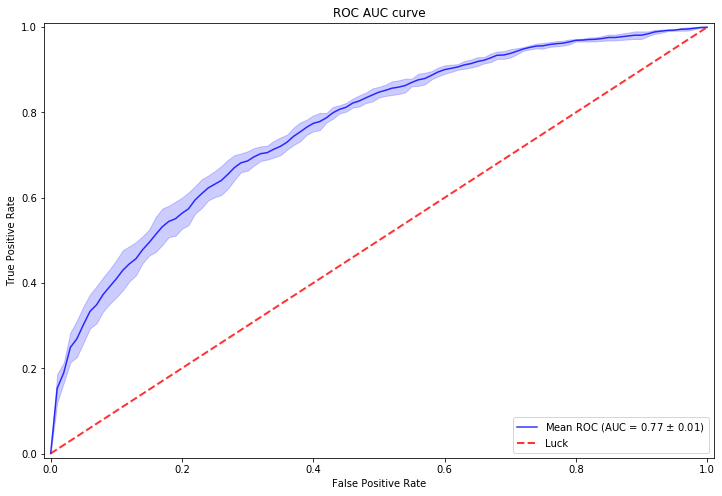

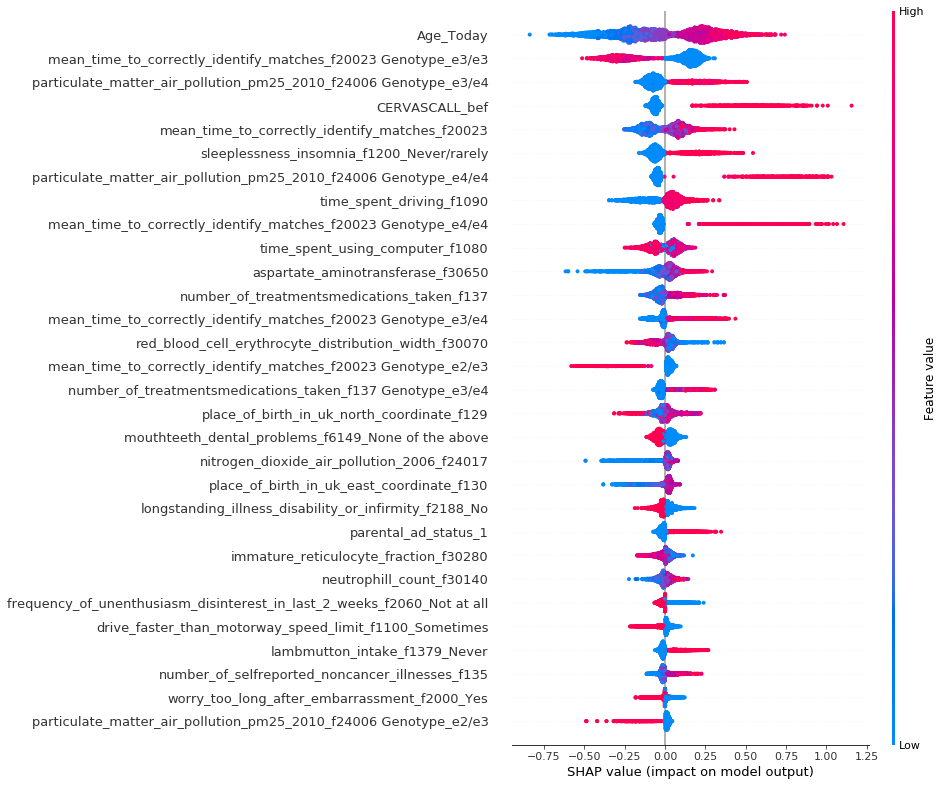


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


Accuracy : 0.6888
1532.0
AUC Score (Train): 0.763914


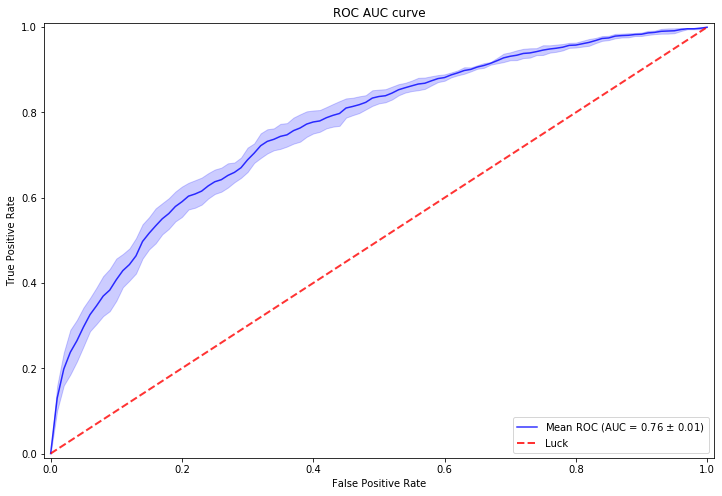

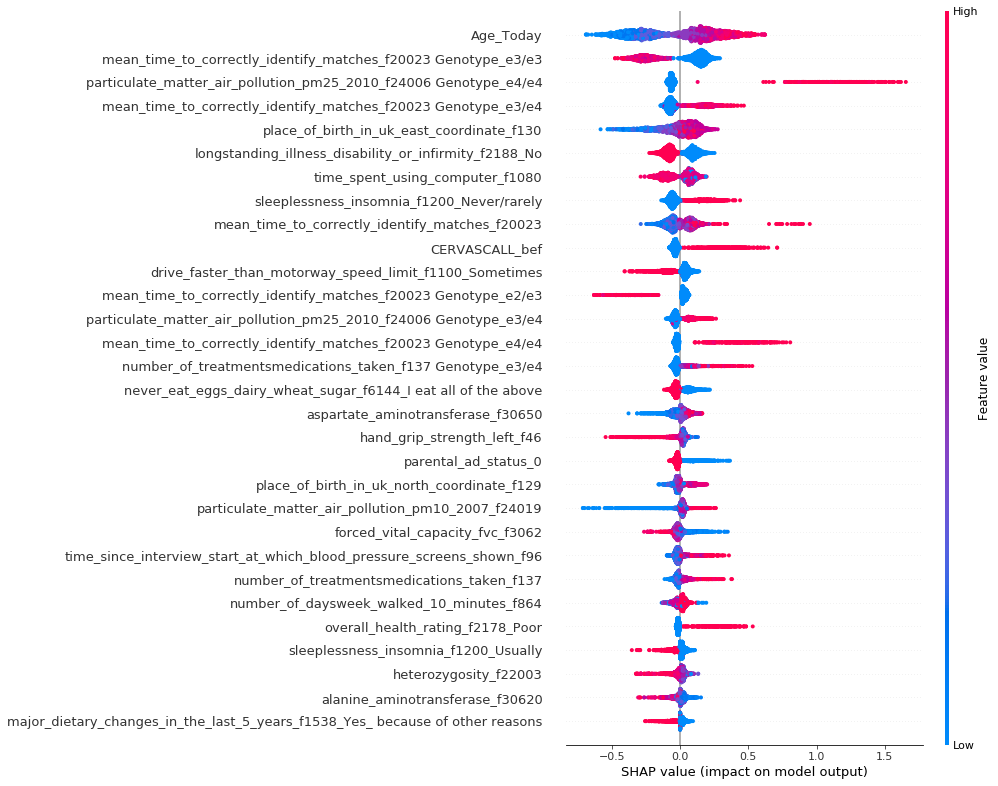

In [37]:
ADY=AD_model_full[(AD_model_full['AD']==1)]

for i in range(5):
    ADN=AD_model_full[(AD_model_full['AD']==0)].sample(ADY.shape[0])
    ADrebal=pd.concat([ADY,ADN],axis=0)
    shapsum=newmodelrun(ADrebal,dropvars=dropvars_full,model=mod_xgb,depvar='AD',reps=1,splits=5)


#### Gridsearch

In [240]:


config = dict(scale_pos_weight = 1,subsample = 0.8, min_child_weight = 5, max_depth = 5, gamma= 2, 
              colsample_bytree= 0.6,smote=1)

mod_xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bynode=1, learning_rate=0.1,
           max_delta_step=0,  missing=None,
           n_estimators=60, n_jobs=4, nthread=4, objective='binary:logistic',
           random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=config['scale_pos_weight'],
           min_child_weight=config['min_child_weight'],
           gamma=config['gamma'], colsample_bytree=config['colsample_bytree'],max_depth=config['max_depth'],
           seed=42, silent=None, subsample=1, verbosity=1)


In [238]:
cols=[col for col in AD_model_full.columns if col in np.asarray(shapsum.head(20)['column_name']) or col=="AD" or col=='eid']

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
X=AD_model_full[cols].drop(columns="AD")
Y=AD_model_full['AD']
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'scale_pos_weight' :[1,6,25]
        }

#xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                    silent=True, nthread=1)


folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(mod_xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3, random_state=1001 )
random_search.fit(X, Y)

#newmodelrun(AD_model_full[cols],dropvars="AD",model=mod_xgb,depvar='AD',reps=1,splits=5)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    8.5s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fd94d13acd0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.6, gamma=5,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=5, min_child_weight=5,
                                           missing=None, n_estimators=60,
                                           n_jobs=4, nthread=4,
                                           objective='binary:logist...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=42, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecat

In [239]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)



 All results:
{'mean_fit_time': array([1.58775091, 1.34685389, 1.09836451, 1.20762618, 1.47692378]), 'std_fit_time': array([0.13723585, 0.15353373, 0.07679243, 0.09053018, 0.01533651]), 'mean_score_time': array([0.05361501, 0.03871028, 0.03705692, 0.04242301, 0.03864487]), 'std_score_time': array([0.00289347, 0.00577175, 0.00258465, 0.00125392, 0.00257106]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_scale_pos_weight': masked_array(data=[6, 1, 6, 6, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 10, 10, 10, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[5, 4, 3, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
  

In [30]:
genotypes[4]

'Genotype_e2/e4'

In [32]:
AD_model_full_geno=replace_genotype(AD_model_full,gen_lkup,genotypes)
#AD_model_full_geno['Genotype']=AD_model_full_geno['Genotype'].apply(lambda x:genotypes[x])
AD_model_full_geno['Genotype'].value_counts()

0    113049
Name: Genotype, dtype: int64

In [ ]:


dropvars_full=varstodrop(AD_model_full,drpvarsapoe,drvarsdef)
mask_apoe=((AD_model_full["Genotype_e3/e4"]==1))
AD_model_full[mask_apoe]['AD'].sum()
shapsumAPOE=newmodelrun(AD_model_full[mask_apoe],dropvars=dropvars_full,model=mod_xgb,depvar='AD',reps=1,splits=2)



Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


Accuracy : 0.9718
0.0
AUC Score (Train): 0.665029


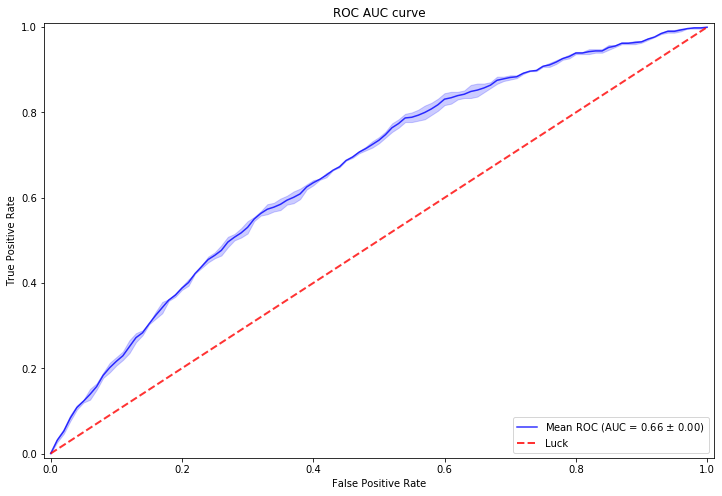

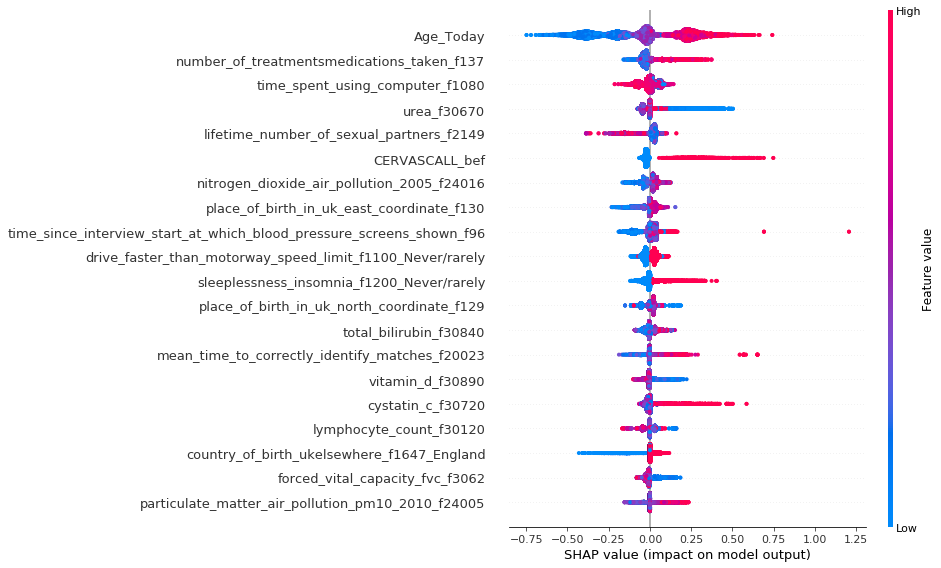

In [214]:
#mask_apoe=((AD_model_full["Genotype_e3/e4"]==1)|(AD_model_full["Genotype_e4/e4"]==1))
dropvars_full=varstodrop(AD_model_full,drpvarsapoe,drvarsdef)
mask_apoe=((AD_model_full["Genotype_e3/e4"]==1)|(AD_model_full["Genotype_e4/e4"]==1))
AD_model_full[mask_apoe]['AD'].sum()
shapsumAPOE=newmodelrun(AD_model_full[mask_apoe],dropvars=dropvars_full,model=mod_xgb,depvar='AD',reps=1,splits=2)


In [56]:
ukb_tp0=pd.read_pickle('%s%s' % (path,'ukb_tp0.p'))
ukb_tp0=ukb_tp0[(ukb_tp0['eid'].isin(AD_model_full['eid']))]

In [8]:
cols=[col for col in AD_model_full if col in np.asarray(shapsum.head(20)['column_name'])]

In [9]:
AD_model_redfeat=AD_model_full[np.append(['AD'],cols)]
AD_model_redfeat2=AD_model_full[np.append(['AD','eid'],cols)]


In [86]:
#rerun model with top features and take interaction values for partial dependence

X=AD_model_redfeat.drop(columns='AD')
y=AD_model_redfeat['AD']
mod_xgb.fit(X, y)
y_pred = mod_xgb.predict(X)

explainer = shap.TreeExplainer(mod_xgb)
shap_interaction_values = explainer.shap_interaction_values(X)



KeyboardInterrupt: 

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = SVC(gamma='auto',probability=True)
newmodelrun(AD_model_redfeat2,dropvars='AD',model=clf,depvar='AD',reps=1,splits=3,shap=0)


Accuracy : 0.9856
1.0
AUC Score (Train): 0.747370


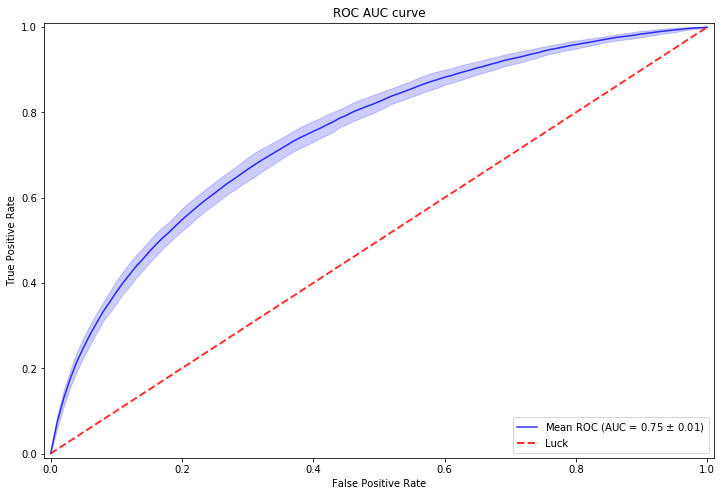

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
model_rf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
newmodelrun(AD_model_redfeat2,dropvars='AD',model=model_rf,depvar='AD',reps=10,splits=5,shap=0)


Accuracy : 0.9856
0.0
AUC Score (Train): 0.710914


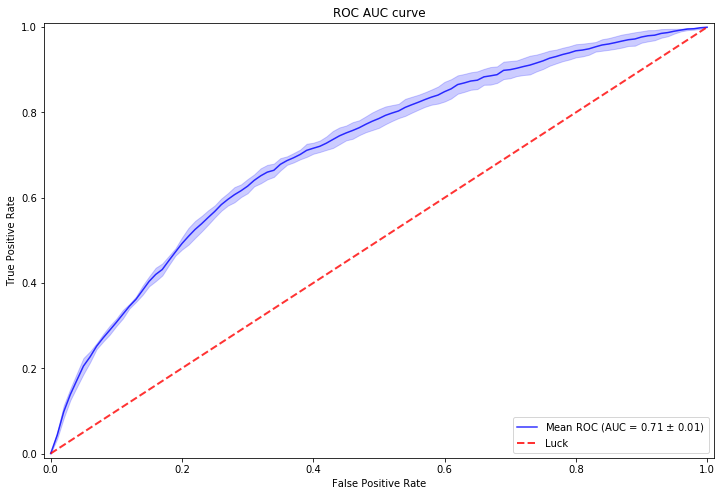

In [10]:
from sklearn.ensemble import RandomForestClassifier
# The target variable is 'quality'.



newmodelrun(AD_model_full,dropvars=dropvars_full,model=model_rf,depvar='AD',reps=1,splits=5,shap=0)



In [60]:
def inter_vals(col1,col2,y=y,intvalues=shap_interaction_values,df=X):
    col1_ind=np.where(df.columns==col1)[0][0]
    #print(col1_ind)
    col2_ind=np.where(df.columns==col2)[0][0]
    #print(col2_ind)
    vals=intvalues[:,col1_ind,col2_ind]
    df=pd.DataFrame({'col1':col1,'col2':col2,'AD':y,'int_vals':vals},index=None)
    return df
    

In [61]:
df_full=pd.DataFrame([])
for col in X.columns:
    for col1 in X.columns:
        if col!=col1:
            df=inter_vals(col,col1,y)
            df_full=pd.concat([df_full,df],axis=0)


In [77]:
datasorted=pd.DataFrame(df_full.groupby(['AD','col1','col2']).agg({'int_vals':['mean','median','std']})).reset_index()
datasorted.columns=['AD','col1','col2','mean_intval','median_intval','std_intval']

In [81]:
datasorted.sort_values(by='mean_intval',ascending=False,inplace=True)

In [82]:
datasorted.head(20)

AD                                               col1  \
479   1                                     Genotype_e4/e4   
460   1                                     Genotype_e3/e4   
456   1                                     Genotype_e3/e4   
383   1                                          Age_Today   
488   1                                     Genotype_e4/e4   
651   1  particulate_matter_air_pollution_pm10_2007_f24019   
708   1          sleeplessness_insomnia_f1200_Never/rarely   
491   1                                     Genotype_e4/e4   
489   1                                     Genotype_e4/e4   
670   1  particulate_matter_air_pollution_pm25_2010_f24006   
484   1                                     Genotype_e4/e4   
575   1                           neutrophill_count_f30140   
391   1                                          Age_Today   
608   1         number_of_treatmentsmedications_taken_f137   
624   1         number_of_treatmentsmedications_taken_f137   
715   1          sleeplessness_insomnia_f1200_Never/rarely   
646   1  particulate_matter_air_pollution_pm10_2007_f24019   
393   1                                          Age_Today   
437   1                                     Genotype_e3/e3   
382   1                                          Age_Today   

                                                  col2  mean_intval  \
479                                     Genotype_e3/e4     0.006029   
460                                     Genotype_e4/e4     0.006029   
456                                          Age_Today     0.005118   
383                                     Genotype_e3/e4     0.005118   
488  particulate_matter_air_pollution_pm10_2007_f24019     0.004140   
651                                     Genotype_e4/e4     0.004140   
708                                     Genotype_e4/e4     0.003919   
491          sleeplessness_insomnia_f1200_Never/rarely     0.003919   
489  particulate_matter_air_pollution_pm25_2010_f24006     0.003435   
670                                     Genotype_e4/e4     0.003435   
484                           neutrophill_count_f30140     0.003285   
575                                     Genotype_e4/e4     0.003285   
391         number_of_treatmentsmedications_taken_f137     0.003012   
608                                          Age_Today     0.003012   
624          sleeplessness_insomnia_f1200_Never/rarely     0.002842   
715         number_of_treatmentsmedications_taken_f137     0.002842   
646                                          Age_Today     0.002746   
393  particulate_matter_air_pollution_pm10_2007_f24019     0.002746   
437                                          Age_Today     0.002659   
382                                     Genotype_e3/e3     0.002659   

     median_intval  std_intval  
479      -0.001131    0.013350  
460      -0.001131    0.013350  
456       0.001206    0.020374  
383       0.001205    0.020374  
488       0.000289    0.025798  
651       0.000289    0.025798  
708       0.000594    0.033560  
491       0.000594    0.033560  
489       0.000473    0.023613  
670       0.000473    0.023613  
484      -0.000132    0.019831  
575      -0.000132    0.019831  
391       0.000690    0.016340  
608       0.000690    0.016340  
624       0.002311    0.012134  
715       0.002311    0.012134  
646       0.001363    0.012582  
393       0.001363    0.012582  
437       0.001018    0.013525  
382       0.001018    0.013525

In [62]:
import seaborn as sns

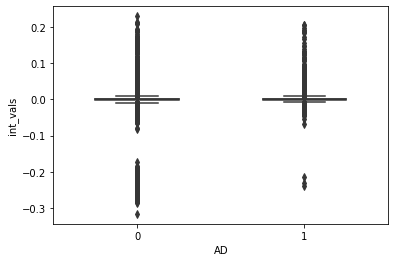

In [72]:
maskcols=(df_full['col1']=="Genotype_e4/e4")&(df_full['col2']=='particulate_matter_air_pollution_pm10_2007_f24019')

bplot = sns.boxplot(y='int_vals', x='AD', 
                 data=df_full[maskcols], 
                 width=0.5,
                 palette="colorblind")

In [66]:

def createpdpplots(df,colsel,shap_interaction_values=shap_interaction_values,numfeats=20):

    tmp = np.abs(shap_interaction_values).mean(0)
    for i in range(tmp.shape[0]):
        tmp[i,i] = 0
    inds = np.argsort(-tmp.mean(0))[:numfeats]
    print(colsel)
    
    for col in df.columns[inds]:
        print(col)
        for col1 in df.columns[inds]:
            if col!=col1 and col1==colsel:
                shap.dependence_plot((col,col1), shap_interaction_values, df,
                                            interaction_index=None,show=False)
                plt.show()
                
    return tmp


Index(['drive_faster_than_motorway_speed_limit_f1100_Sometimes',
       'sleeplessness_insomnia_f1200_Never/rarely',
       'longstanding_illness_disability_or_infirmity_f2188_No',
       'diabetes_diagnosed_by_doctor_f2443_No',
       'never_eat_eggs_dairy_wheat_sugar_f6144_I eat all of the above',
       'parental_ad_status_0', 'Genotype_e2/e3', 'Genotype_e3/e3',
       'Genotype_e3/e4', 'Genotype_e4/e4',
       'place_of_birth_in_uk_east_coordinate_f130',
       'number_of_treatmentsmedications_taken_f137',
       'time_spent_using_computer_f1080',
       'frequency_of_solariumsunlamp_use_f2277',
       'mean_time_to_correctly_identify_matches_f20023',
       'particulate_matter_air_pollution_pm25_2010_f24006', 'Age_Today',
       'CERVASCALL_bef', 'Age_Today Genotype_e3/e4',
       'Age_Today Genotype_e4/e4'],
      dtype='object')

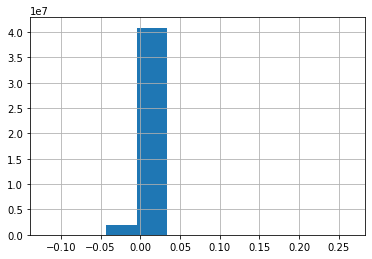

In [47]:
df_full['int_vals'].hist()

In [37]:
shap_interaction_values.sum()

-19581.732

In [22]:
np.where(X.columns=='mean_time_to_correctly_identify_matches_f20023')[0][0]

14

In [15]:
shap_interaction_values.shape

(113049, 20, 20)

In [18]:
shap_interaction_values[:,4,4]

array([ 0.056855  ,  0.05654752, -0.02842671, ...,  0.05612386,
        0.06161024, -0.02838041], dtype=float32)

In [75]:
findcols(AD_model_redfeat,'Genotype')

['Genotype']

In [ ]:
shapsum=newmodelrun(AD_model_redfeat,dropvars='AD',model=mod_xgb,depvar='AD',reps=1,splits=5)


In [70]:
shap_interaction_values.shape

(114305, 20, 20)

particulate_matter_air_pollution_pm25_2010_f24006
Genotype


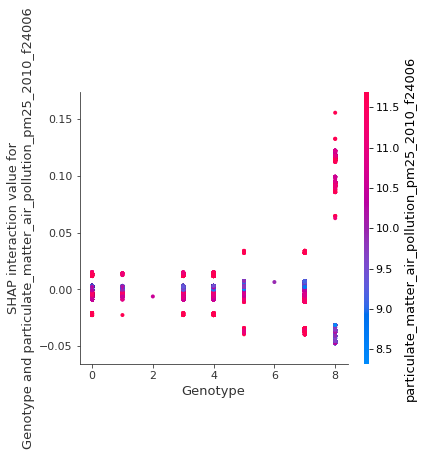

Age_Today


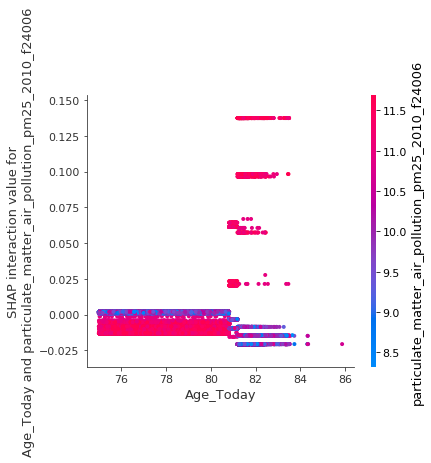

time_spent_using_computer_f1080


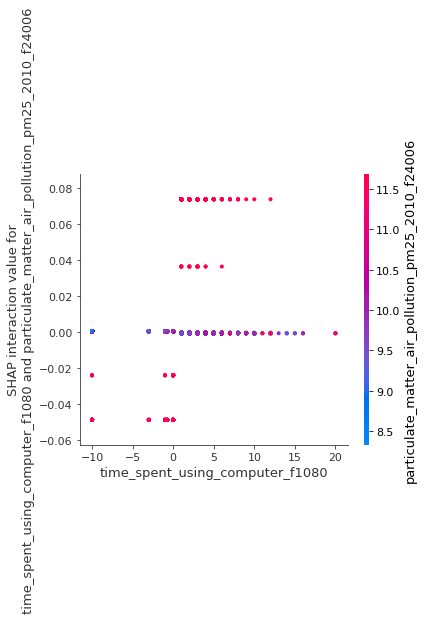

never_eat_eggs_dairy_wheat_sugar_f6144_I eat all of the above


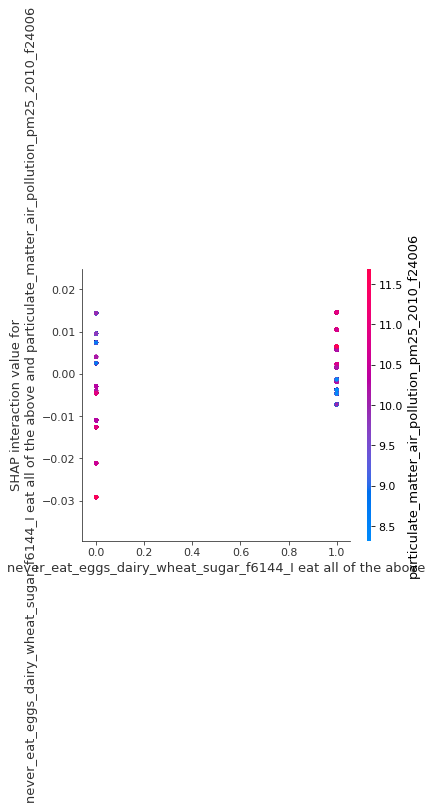

DIAB_bef


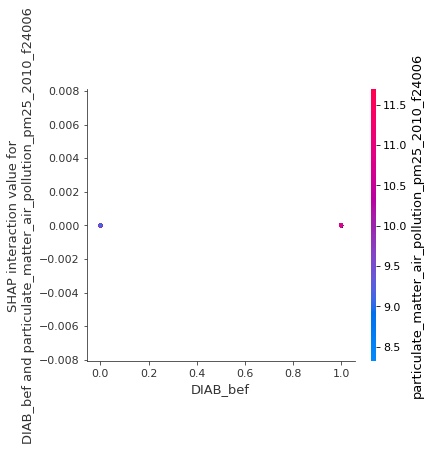

mean_time_to_correctly_identify_matches_f20023


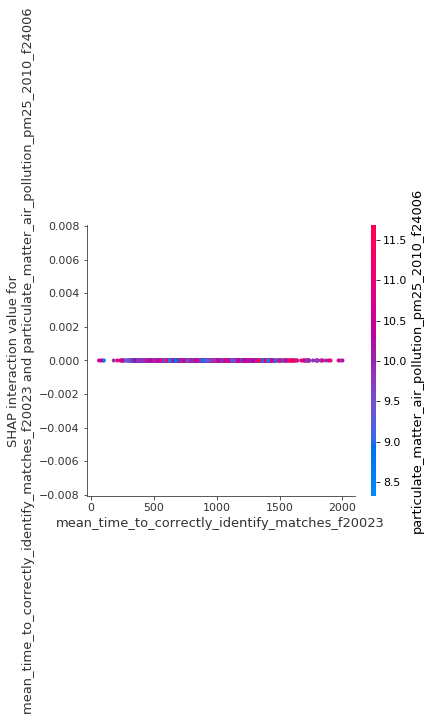

mothers_age_at_death_f3526


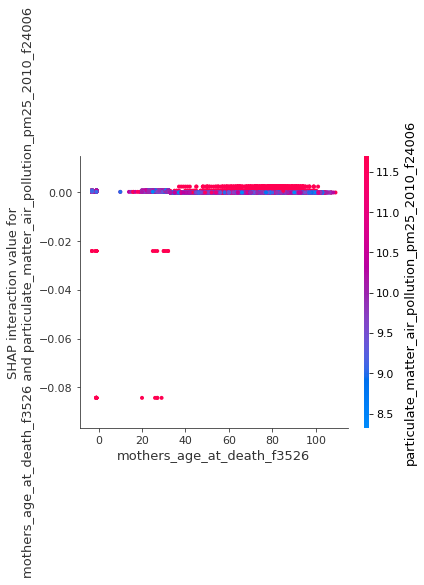

diabetes_diagnosed_by_doctor_f2443_Yes


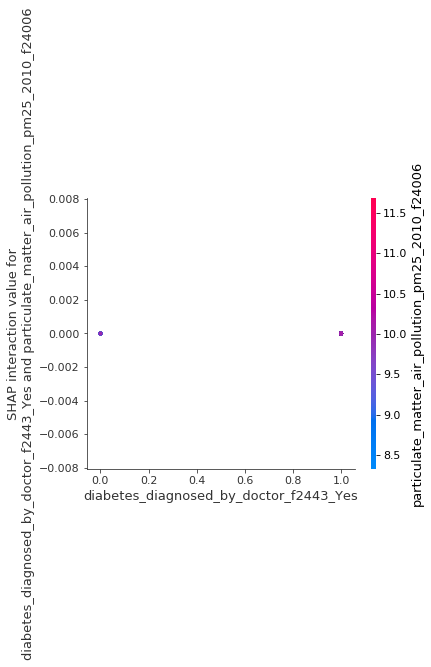

place_of_birth_in_uk_east_coordinate_f130


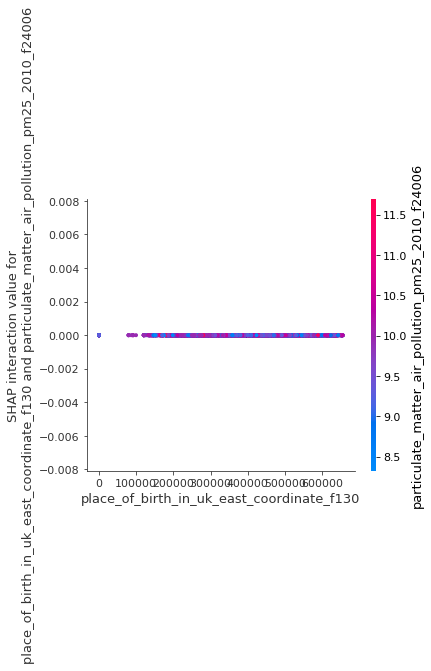

number_of_treatmentsmedications_taken_f137


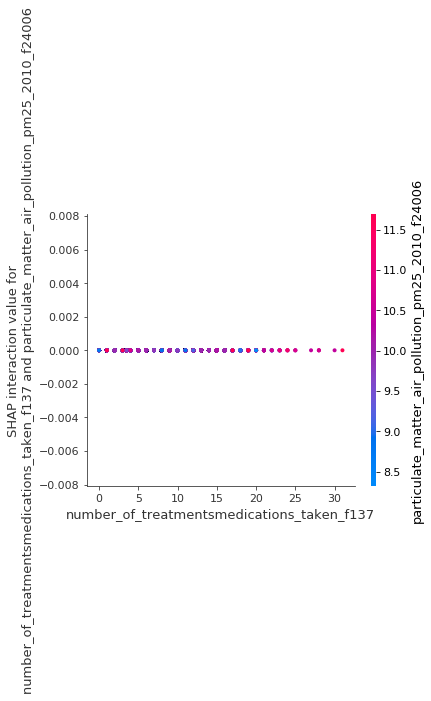

parental_ad_status_0


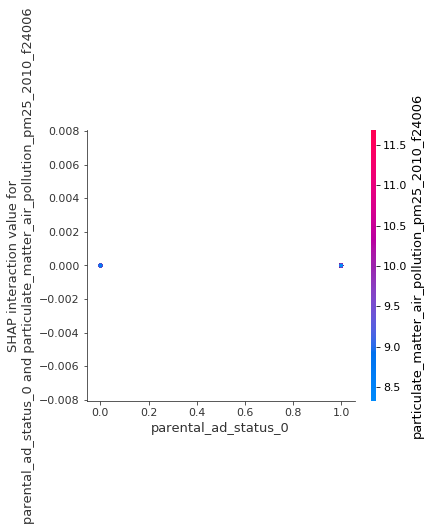

sleeplessness_insomnia_f1200_Never/rarely


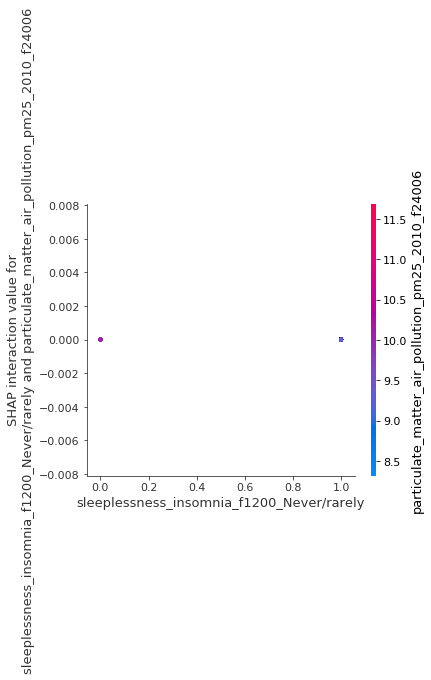

ever_had_samesex_intercourse_f2159_No


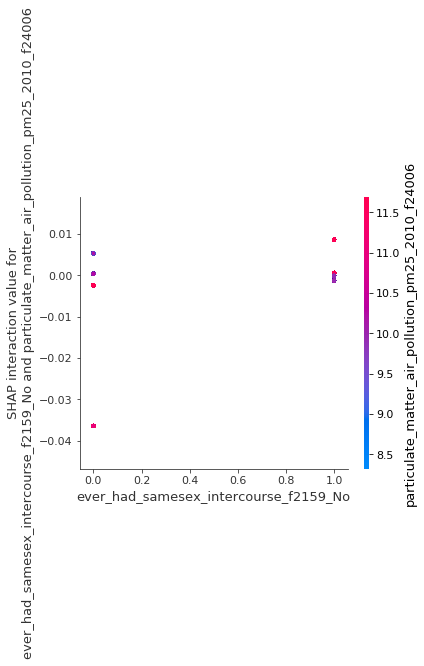

carer_support_indicators_f41214_No


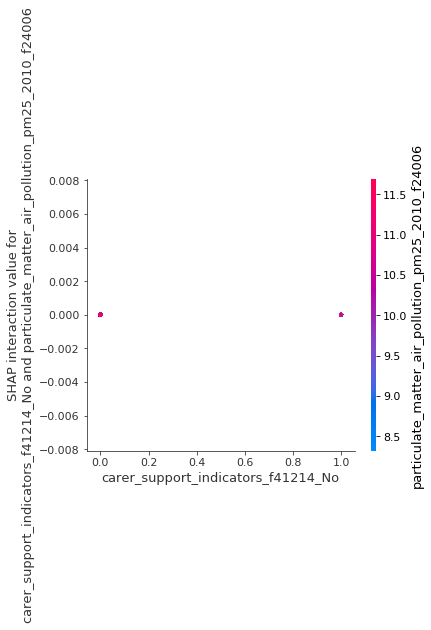

longstanding_illness_disability_or_infirmity_f2188_No


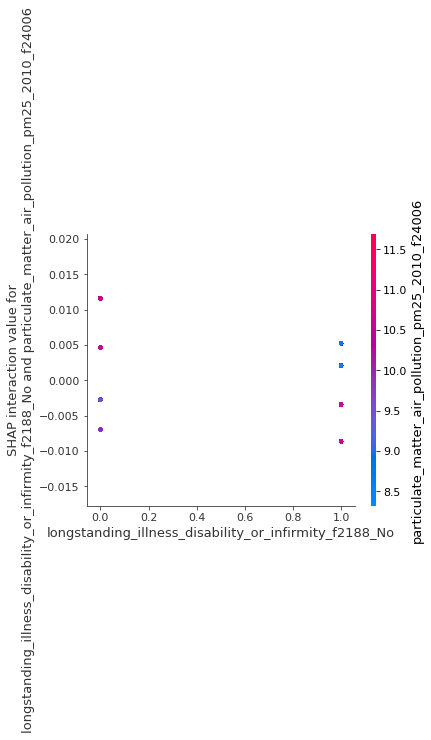

CERVASC_bef


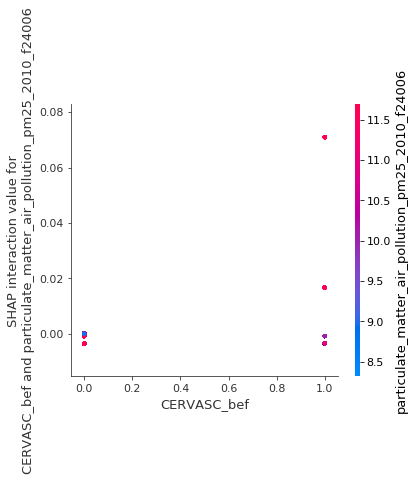

particulate_matter_air_pollution_pm25_2010_f24006
frequency_of_solariumsunlamp_use_f2277


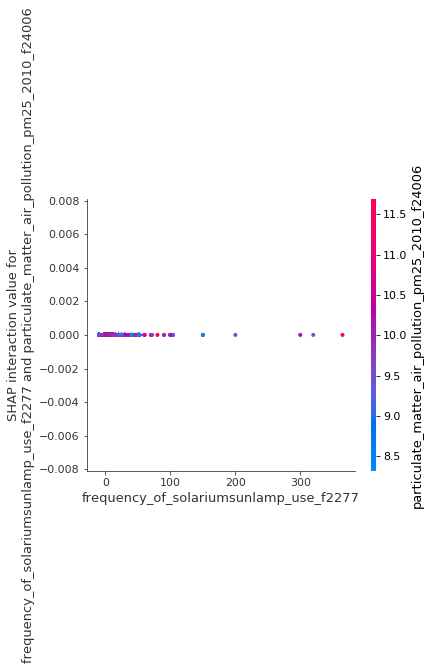

year_of_birth_f34


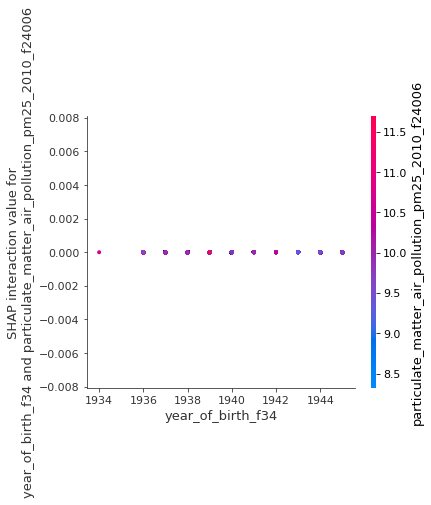

diabetes_diagnosed_by_doctor_f2443_No


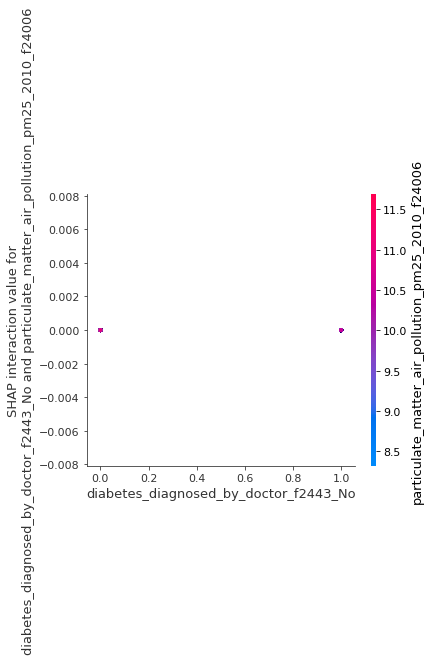

array([[0.00000000e+00, 0.00000000e+00, 3.23843746e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.51669688e-03, 4.25787224e-03, 7.69933732e-03,
        0.00000000e+00, 1.63493468e-03, 9.16642079e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.20276556e-04, 7.91533291e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.67091352e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.92805659e-03, 4.91928263e-03, 0.00000000e+00, 0.00000000e+00,
        5.44516661e-04, 1.13383750e-03, 6.96729496e-03, 2.24274292e-04,
        3.92203080e-03, 0.00000000e+00, 2.30427700e-04, 6.89240405e-03],
       [3.23843746e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.66332182e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.9794

In [67]:
createpdpplots(X,'particulate_matter_air_pollution_pm25_2010_f24006')

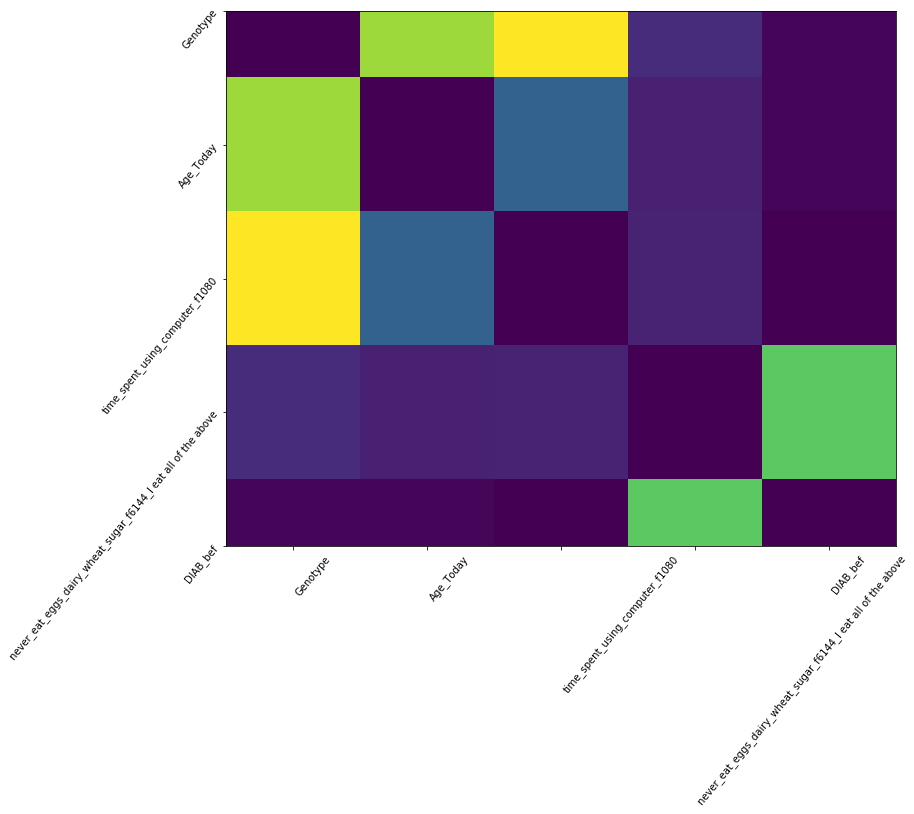

In [51]:
tmp = np.abs(shap_interaction_values).mean(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.mean(0))[:5]
tmp2 = tmp[inds,:][:,inds]
plt.figure(figsize=(12,12))
plt.imshow(tmp2)
plt.yticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="right")
plt.xticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="left")
#pl.gca().xaxis.tick_top()
plt.show()

sleeplessness_insomnia_f1200


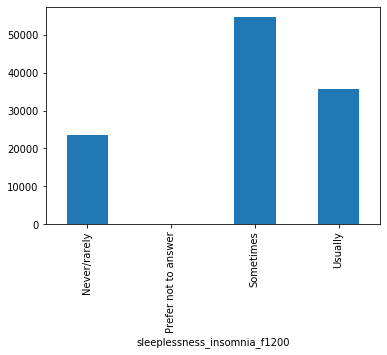

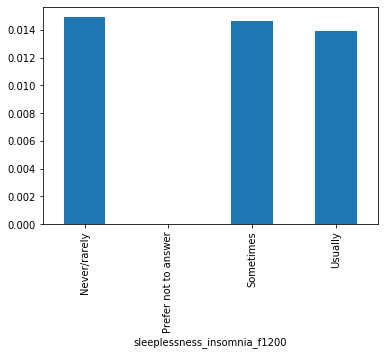

ever_had_samesex_intercourse_f2159


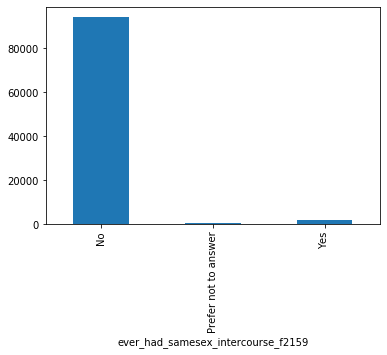

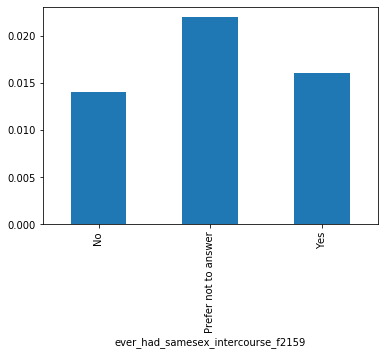

longstanding_illness_disability_or_infirmity_f2188


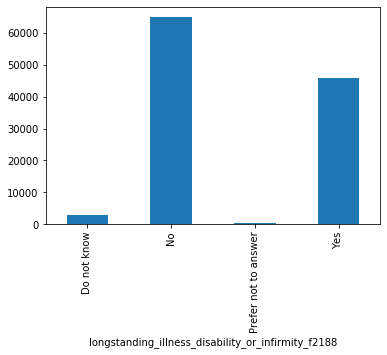

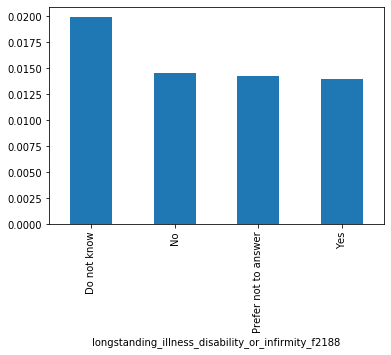

diabetes_diagnosed_by_doctor_f2443


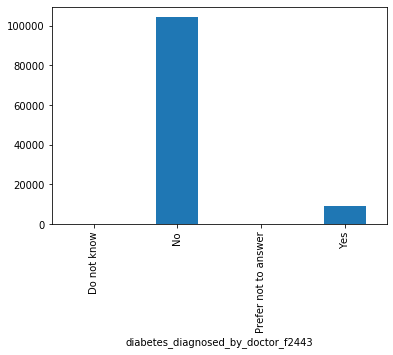

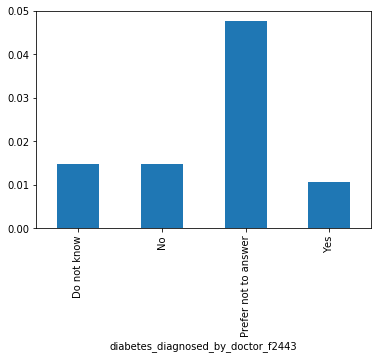

never_eat_eggs_dairy_wheat_sugar_f6144


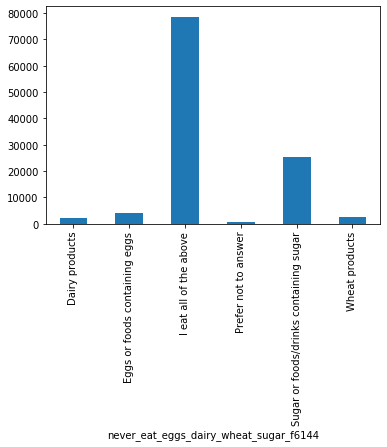

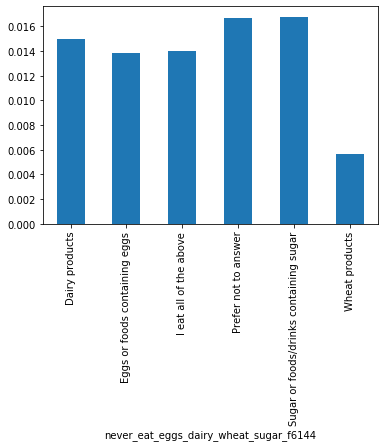

parental_ad_status


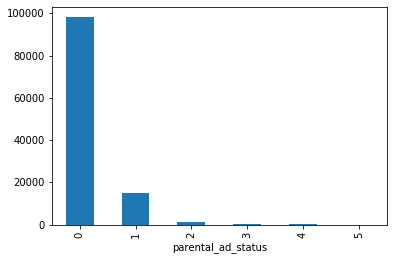

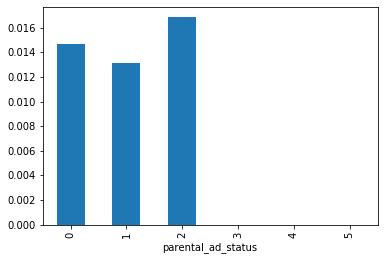

Genotype


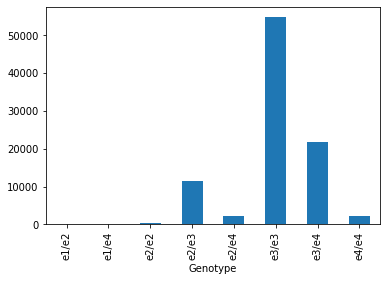

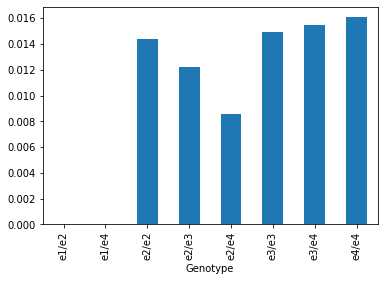

In [25]:
df=ukb_tp0_o75_dis[np.append(colstopfeats,'AD')]
for col in df.columns:
    if col!="AD" and df[col].dtype!='float64':
        print(col)
        df.groupby([col])['AD'].size().plot(kind='bar')
        plt.show()
        df.groupby([col])['AD'].mean().plot(kind='bar')
        plt.show()

In [8]:
for col in shapsum.head(15)['colum_name']:
    for col2 in ukb_tp0_o75_dis.columns:
        if re.search()

column_name  mean_shap_imp  \
6                                              Genotype       0.389513   
0                                             Age_Today       0.114255   
1110                    time_spent_using_computer_f1080       0.049318   
3                                           CERVASC_bef       0.040118   
783   never_eat_eggs_dairy_wheat_sugar_f6144_I eat a...       0.039432   

      std_shap_imp  min_rank  max_rank  mean_rank  median_rank  std_rank  
6         0.012320         0         0        0.0            0  0.000000  
0         0.008990         1         1        1.0            1  0.000000  
1110      0.007895         2         6        3.8            4  1.788854  
3         0.004733         4         8        5.4            5  1.673320  
783       0.017392         2         9        6.0            7  2.645751

In [48]:

AD_modelage=pd.read_pickle('%s%s' % (path,'AD_modelage.p'))


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy : 0.9655
0.0
AUC Score (Train): 0.746148


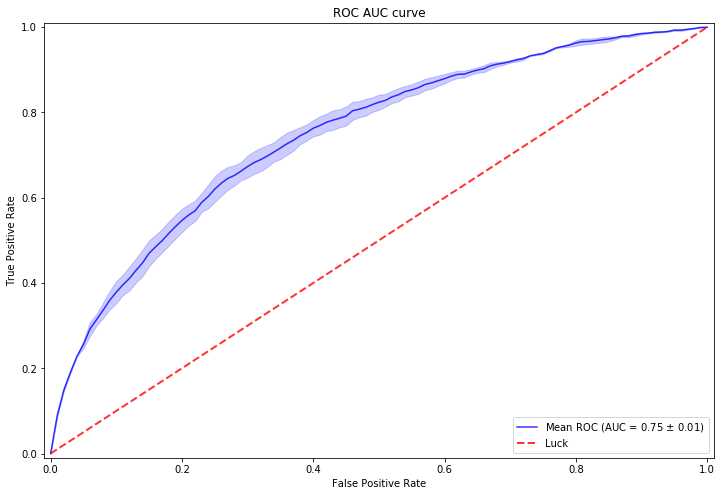

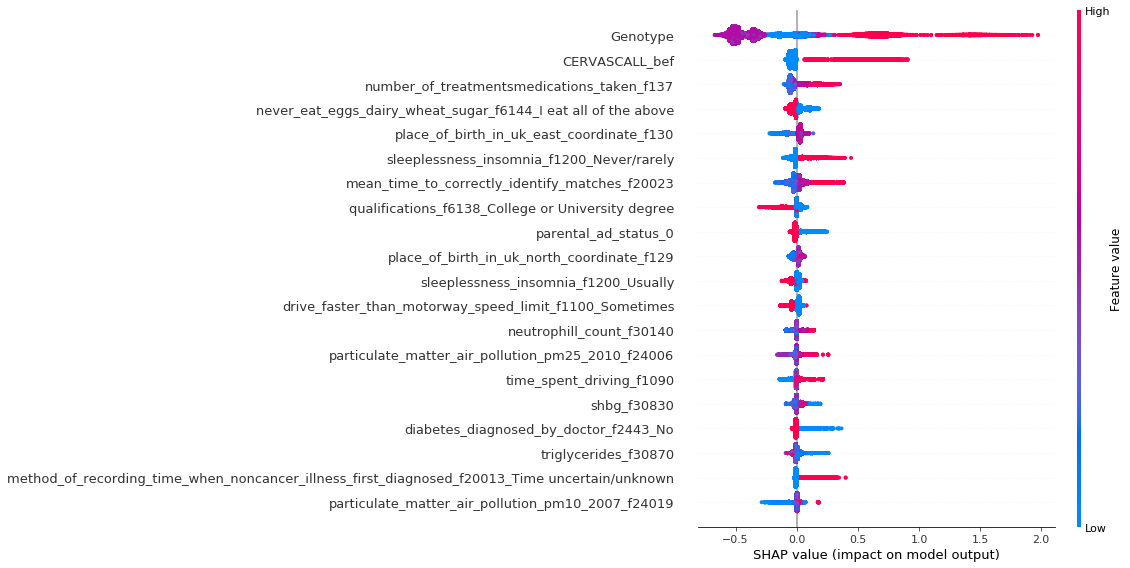

In [34]:
AD_modelage=replace_genotype(AD_modelage,gen_lkup,genotypes)
AD_modelage=replacenullsmean(AD_modelage)
AD_modelage=col_spec_chars(AD_modelage)


dropvars_full=varstodrop(AD_modelage,drpvars1,drvarsdef)
newmodelrun(AD_modelage,dropvars=dropvars_full,model=mod_xgb,depvar='AD',reps=1,splits=2)


In [35]:
#AD_model_full=replace_genotype(AD_model_full,gen_lkup,genotypes)
#AD_model_full=replacenullsmean(AD_model_full)
#AD_model_full=col_spec_chars(AD_model_full)

In [50]:
#ukb_tp0=pd.read_pickle('%s%s' % (path,'ukb_tp0.p'))
ukb_tp0_o75=ukb_tp0[(ukb_tp0['eid'].isin(AD_model_full['eid']))]
findcols(ukb_tp0_o75,'sleeplessness')

['sleeplessness_insomnia_f1200']

In [23]:
X.values

array([[1., 0., 0., ..., 0., 0., 4.],
       [1., 0., 0., ..., 0., 0., 4.],
       [1., 0., 0., ..., 0., 0., 7.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

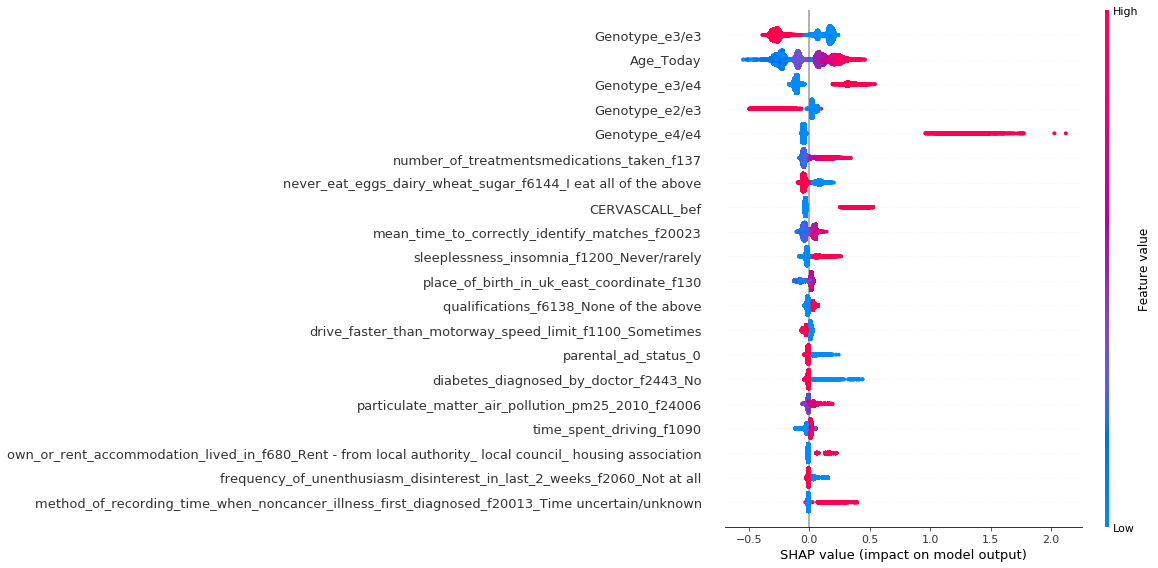

In [38]:
dropvars_full=varstodrop(AD_model_full,drpvars1,drvarsdef)
X=AD_model_full.drop(columns=dropvars_full)
y=AD_model_full['AD']
mod_xgb_fitted=mod_xgb.fit(X.values,y,eval_metric="mlogloss")
explainer = shap.TreeExplainer(mod_xgb_fitted)
shap_values = explainer.shap_values(X.values)
shap.summary_plot(shap_values, X,feature_names=X.columns)

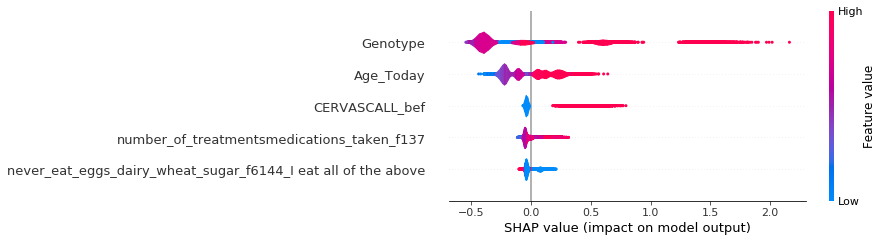

In [28]:
shap.summary_plot(shap_values, X,plot_type='violin',max_display=5)

In [29]:
shap.summary_plot(shap_values[0], X,plot_type='bar',max_display=5)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [10]:
shap_interaction_values = explainer.shap_interaction_values(X[['Genotype','Age_Today']].sample(20))

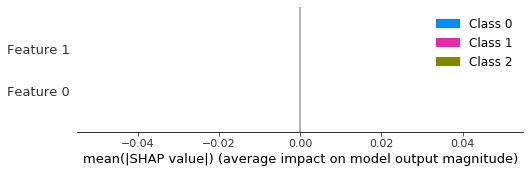

In [18]:
import numpy as np
from xgboost import XGBClassifier
import shap

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array(["A", "B", "C", "A", "B"])

model = XGBClassifier()
model.fit(X, y, eval_metric="mlogloss")
y_pred = model.predict(X)

explainer = shap.TreeExplainer(model)
shap_interaction_values = explainer.shap_interaction_values(X[['Genotype','Age_Today']].sample(20))

shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [132]:
df1=pd.DataFrame(shap_values,columns=X.columns)
for col in df1.columns:
    if col!='eid':
        df1[col]=abs(df1[col])
df1=df1[[col for col in df1.columns if col!='eid']]
df1.columns=[col+" shap" for col in df1.columns]
df1['eid']=X['eid']
df1=pd.merge(X,df1,on='eid',how='left')
df1['Genotype_name']=df1['Genotype'].map(gen_lkup_rev)

In [136]:
def shapaverage(df,groupbyvar,measurevar,genotypes=genotypes):
    print(measurevar)
    mask=(df[groupbyvar].isin(genotypes))
    df2=df[mask]
    df2.groupby(groupbyvar)[measurevar].mean().plot(kind='barh')
    plt.Title='fff'
    plt.show()
genotypes=['Genotype_e4/e4','Genotype_e3/e4','Genotype_e3/e3','Genotype_e2/e3']    

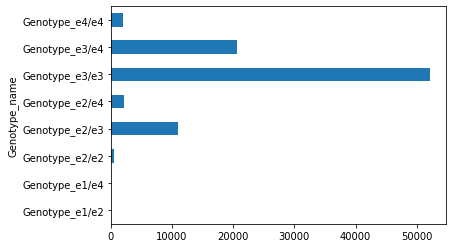

number_of_treatmentsmedications_taken_f137 shap


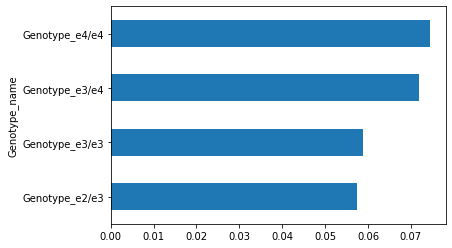

CERVASCALL_bef shap


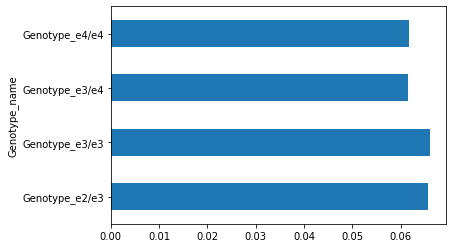

mean_time_to_correctly_identify_matches_f20023 shap


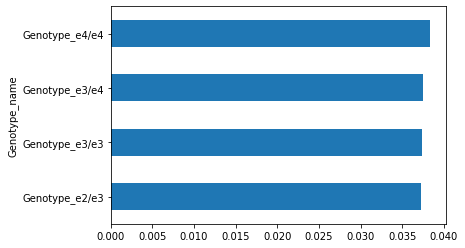

diabetes_diagnosed_by_doctor_f2443_No shap


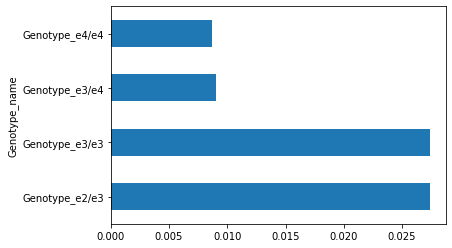

particulate_matter_air_pollution_pm25_2010_f24006 shap


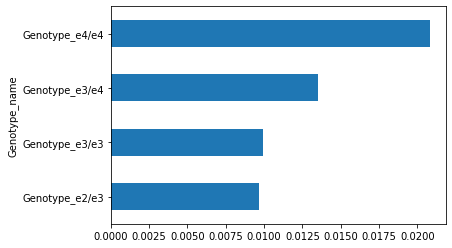

parental_ad_status_0 shap


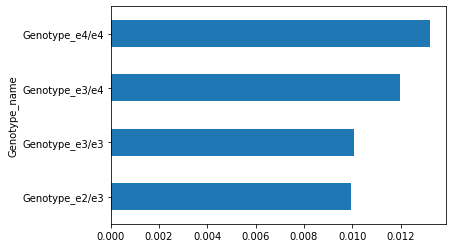

overall_health_rating_f2178_Poor shap


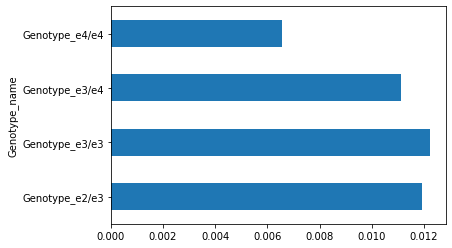

In [137]:
df1.groupby('Genotype_name').size().plot(kind='barh')
plt.show()
shapaverage(df1,'Genotype_name','number_of_treatmentsmedications_taken_f137 shap',genotypes)
shapaverage(df1,'Genotype_name','CERVASCALL_bef shap',genotypes)
shapaverage(df1,'Genotype_name','mean_time_to_correctly_identify_matches_f20023 shap',genotypes)
shapaverage(df1,'Genotype_name','diabetes_diagnosed_by_doctor_f2443_No shap',genotypes)
shapaverage(df1,'Genotype_name','particulate_matter_air_pollution_pm25_2010_f24006 shap',genotypes)
shapaverage(df1,'Genotype_name','parental_ad_status_0 shap',genotypes)
shapaverage(df1,'Genotype_name','overall_health_rating_f2178_Poor shap',genotypes)





In [ ]:
'diabetes_diagnosed_by_doctor_f2443_No shap'

In [18]:
createpdpplots(X.sample(2000),'Genotype',explainer,numfeats=10)

KeyboardInterrupt: 

In [23]:
mod_xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
           max_delta_step=0, max_depth=config['max_depth'], min_child_weight=1, missing=None,
           n_estimators=60, n_jobs=4, nthread=4, objective='binary:logistic',
           random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=config['scale_pos_weight'],
           seed=42, silent=None, subsample=1, verbosity=1)

In [24]:
dropvars_full=varstodrop(AD_model_full,drpvars1,drvarsdef)

In [25]:
X = AD_model_full.drop(columns=dropvars_full)
y = AD_model_full['AD']

In [26]:
X.columns=X.columns.str.replace(',','')
X.columns=X.columns.str.replace('<','')
X.columns=X.columns.str.replace('>','')
X.columns=X.columns.str.replace('[','')
X.columns=X.columns.str.replace(']','')

In [17]:
gen_lkup={'Genotype_e1/e2':1,"Genotype_e2/e2":2,"Genotype_e2/e3":3,"Genotype_e3/e3":4,
          "Genotype_e1/e4":5,"Genotype_e2/e4":5,"Genotype_e3/e4":7,"Genotype_e4/e4":8}



In [27]:
X1=X.copy()
X1['AD']=AD_model_full['AD']


X1['Genotype']=0
for col in X1.columns:
    
    if 'Genotype' in col and col!='Genotype':
        #print(X1['Genotype'].value_counts())
        #print(col)
        mask_col=(X1[col]==1)
        X1['Genotype'][mask_col]=dictlkup[col]

colsfilt=[col for col in X1.columns if ('Genotype' not in col or col=='Genotype') and col!="AD"]
colsfiltAD=[col for col in X1.columns if ('Genotype' not in col or col=='Genotype') or col=='AD']

#### Model AUC ROC

#### Model interpretation

#### Interaction Interpretation

In [ ]:
explainer=shap.TreeExplainer(mod_xgb)


In [28]:
X1['Genotype'].value_counts()

4    52128
7    20666
0    19305
3    11039
5     2216
8     2034
2      495
1        1
Name: Genotype, dtype: int64

In [29]:
colsfilt=[col for col in X1.columns if ('Genotype' not in col or col=='Genotype') and col!="AD"]
colsfiltAD=[col for col in X1.columns if ('Genotype' not in col or col=='Genotype') or col=='AD']

In [30]:
X2=X1[colsfiltAD]
X1=X1[colsfilt]


In [31]:
mod_xgb.fit(X1,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=60, n_jobs=4,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [32]:
import shap
explainer=shap.TreeExplainer(mod_xgb)

In [33]:
shap.dependence_plot(("Age_Today", "Genotype"), shap_interaction_values, X1.iloc[:2000,:],interaction_index=None)

NameError: name 'shap_interaction_values' is not defined

In [ ]:
tmp = np.abs(shap_interaction_values).mean(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.mean(0))[:10]
tmp2 = tmp[inds,:][:,inds]
print(X1.columns[inds])


  

In [34]:
def createpdpplots(df,colsel,numfeats=10):

    shap_interaction_values = explainer.shap_interaction_values(df)

    tmp = np.abs(shap_interaction_values).mean(0)
    for i in range(tmp.shape[0]):
        tmp[i,i] = 0
    inds = np.argsort(-tmp.mean(0))[:numfeats]
    for col in df.columns[inds]:
        for col1 in df.columns[inds]:
            if col!=col1 and col1==colsel:
                shap.dependence_plot((col,col1), shap_interaction_values, df,
                                            interaction_index=None,show=False)
                plt.show()


In [ ]:
createpdpplots(X1,'Genotype',6)

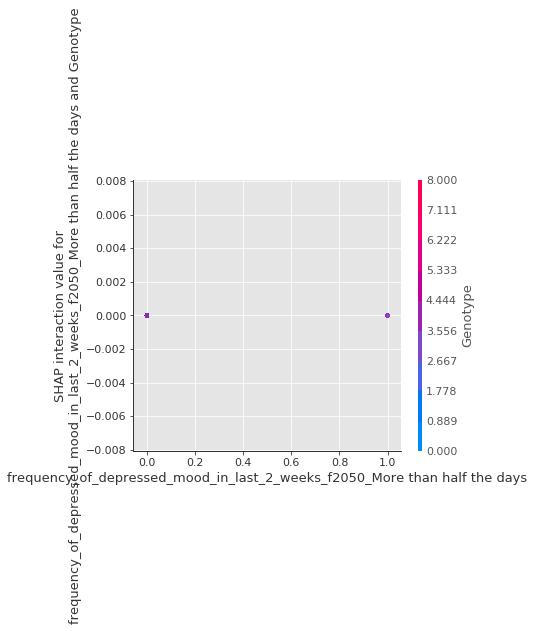

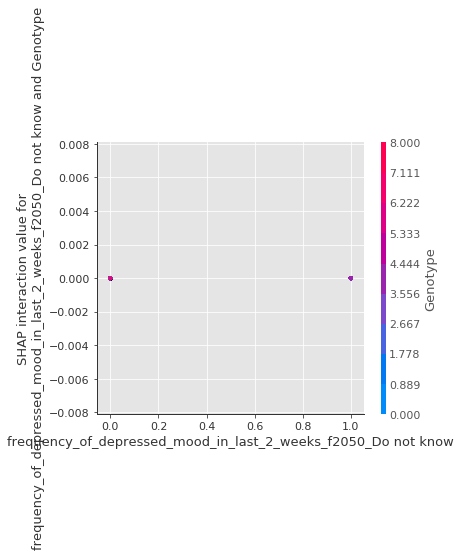

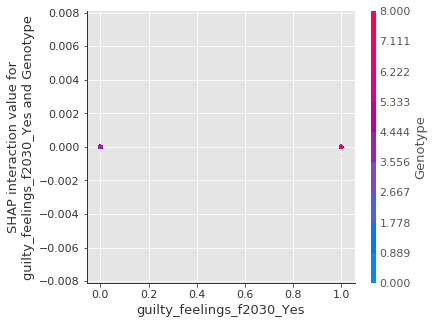

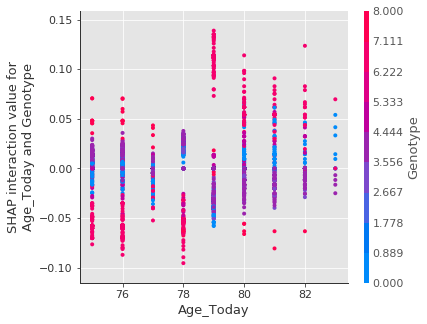

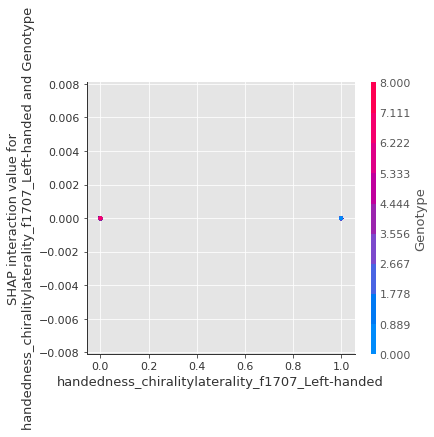

In [35]:
createpdpplots(X1.sample(5000),'Genotype',6)

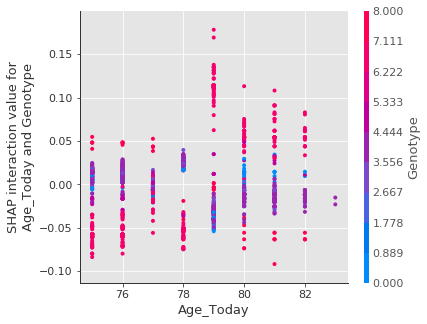

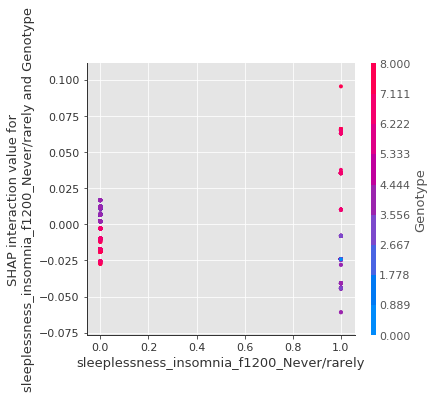

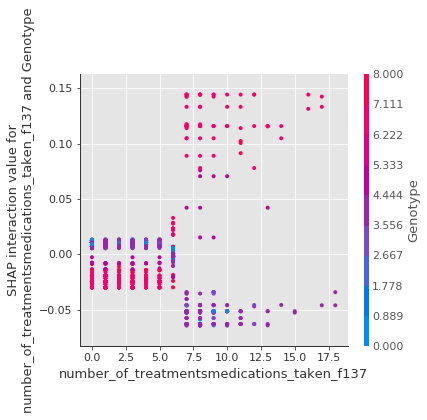

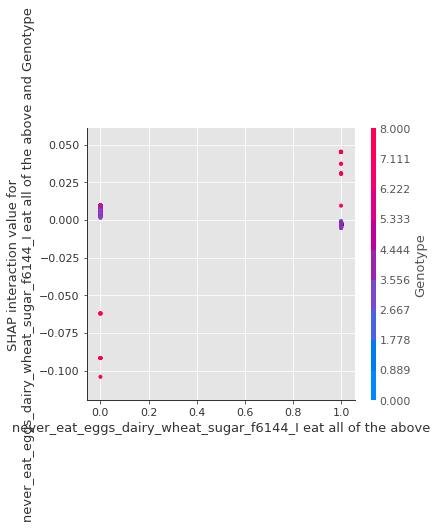

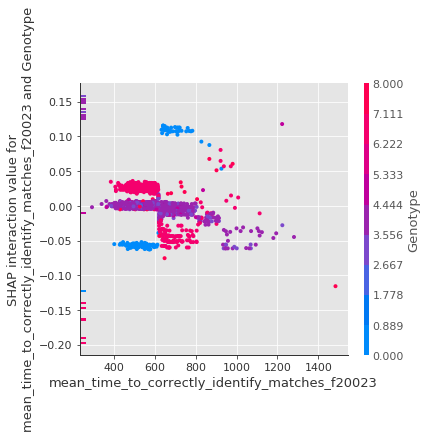

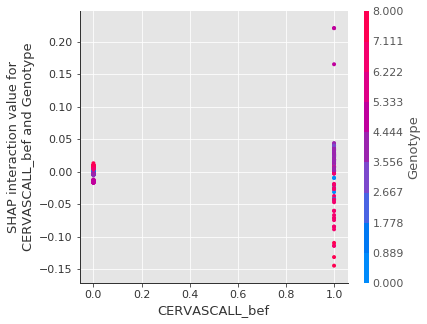

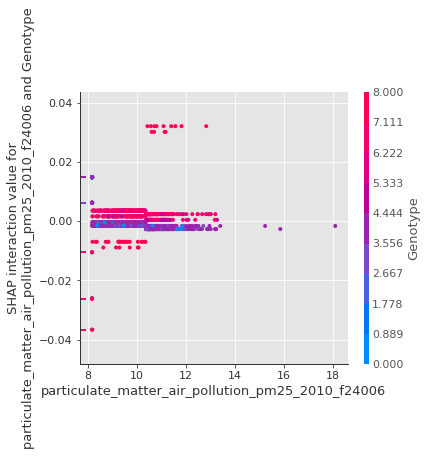

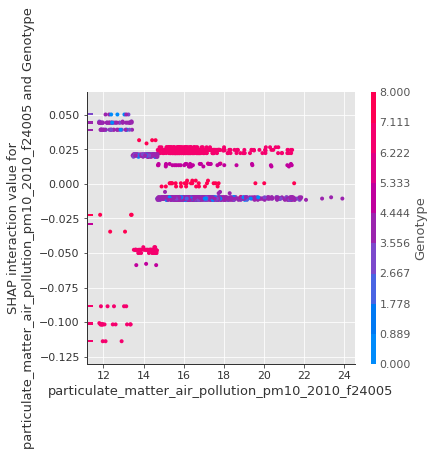

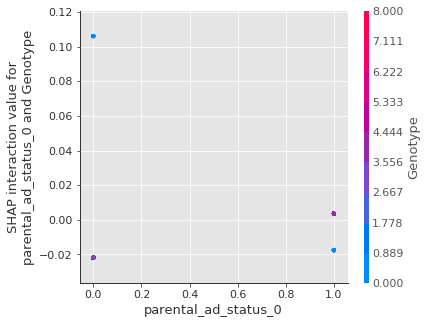

In [83]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.
for col in X1.columns[inds]:
    for col1 in X1.columns[inds]:
        if col!=col1 and col1=='Genotype':
            shap.dependence_plot((col,col1), shap_interaction_values, X1.iloc[:2000,:],
                                        interaction_index=None,show=False)

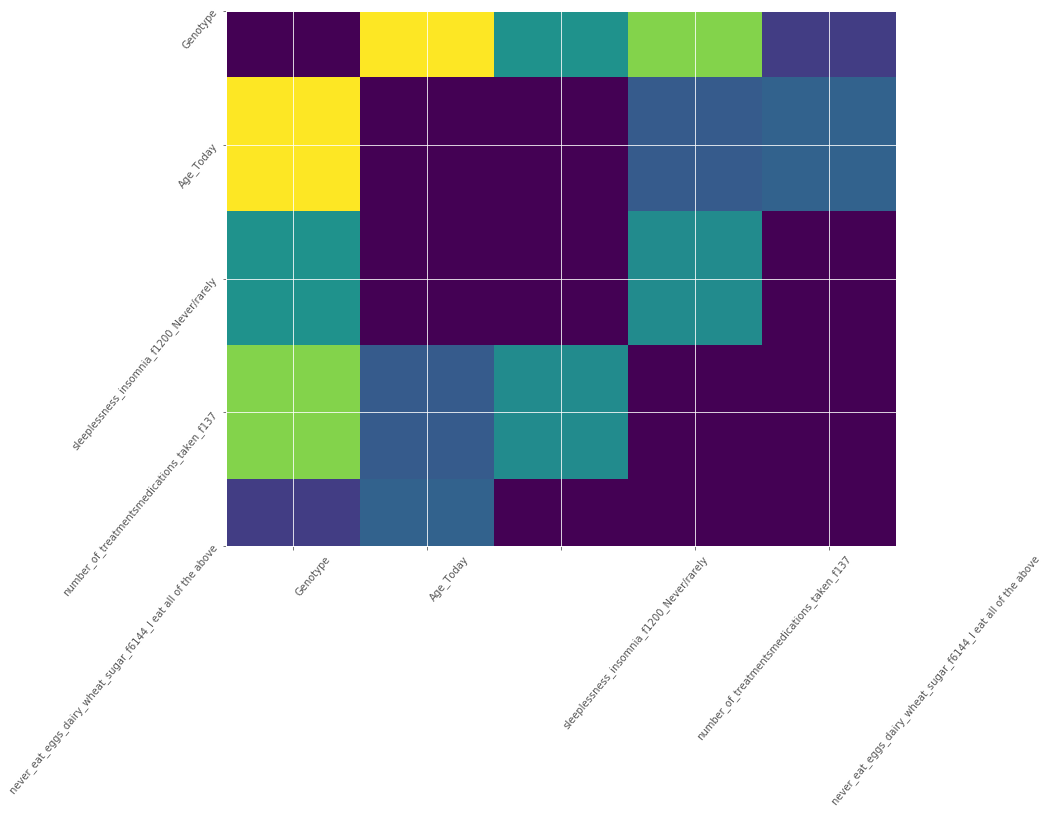

In [62]:
tmp = np.abs(shap_interaction_values).mean(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.mean(0))[:5]
tmp2 = tmp[inds,:][:,inds]
pl.figure(figsize=(12,12))
pl.imshow(tmp2)
pl.yticks(range(tmp2.shape[0]), X1.columns[inds], rotation=50.4, horizontalalignment="right")
pl.xticks(range(tmp2.shape[0]), X1.columns[inds], rotation=50.4, horizontalalignment="left")
#pl.gca().xaxis.tick_top()
pl.show()

<Figure size 1440x1440 with 0 Axes>

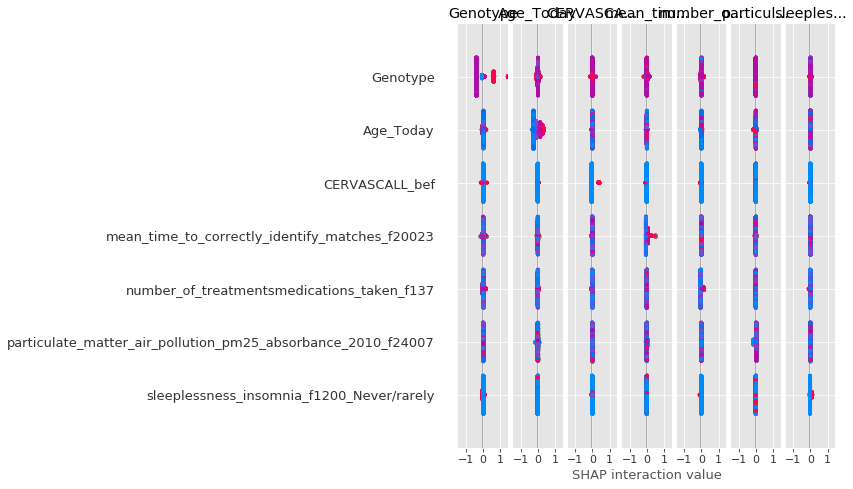

In [60]:
plt.figure(figsize=(20,20))
shap.summary_plot(shap_interaction_values, X1.iloc[:2000,:])

In [ ]:
shap_values = explainer.shap_values(X1)

KeyboardInterrupt: 

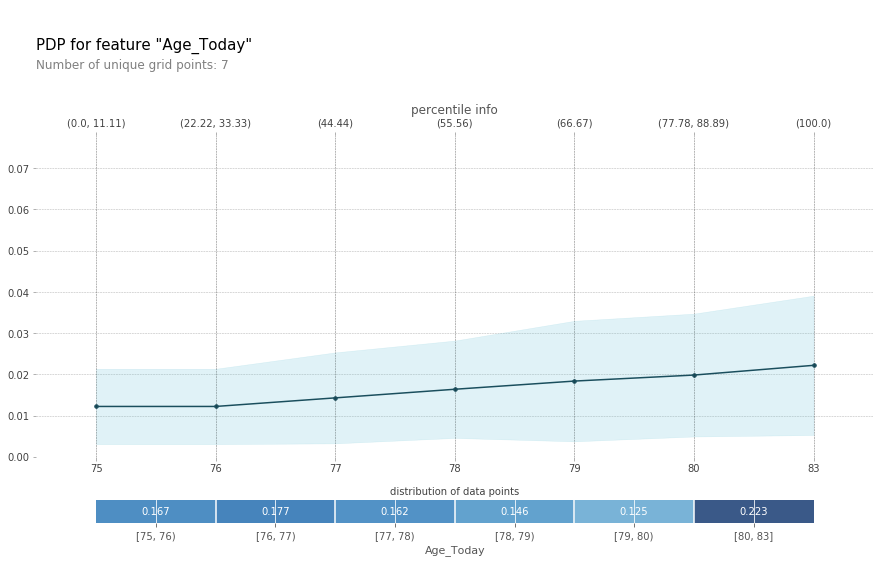

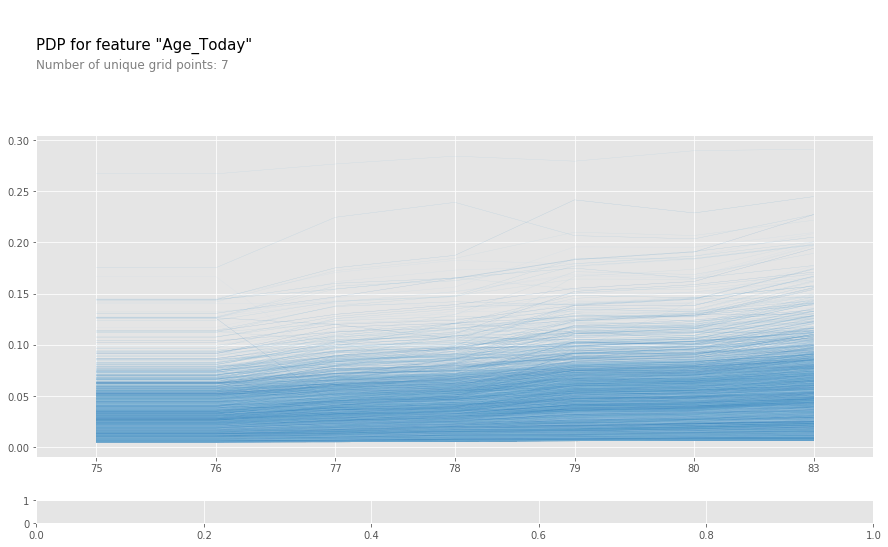

In [46]:
from pdpbox import pdp, info_plots
pdp_age = pdp.pdp_isolate(
    model=mod_xgb, dataset=X1, model_features=X1.columns, feature='Age_Today'
)
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_age, 'Age_Today', plot_lines=False, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)
#ICE Plot
fig, axes = pdp.pdp_plot(pdp_age, 'Age_Today', plot_lines=True, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)
plt.show()

In [ ]:
import shap
explainer=shap.TreeExplainer(mod_xgb)
#
shap_values = explainer.shap_values(X1)

In [ ]:
findcols(X1,'pollution')

In [ ]:
shap.summary_plot(shap_values, X1)

In [ ]:
shap_interaction_values.shape

In [ ]:
shap.dependence_plot(("Age_Today", "Genotype"), shap_interaction_values, X1.iloc[:2000,:],interaction_index=None)

AssertionError: 'shap_values' must have the same number of columns as 'features'!

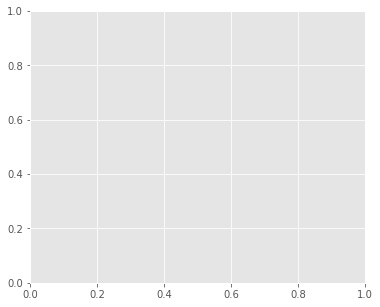

In [47]:
shap.dependence_plot(("CERVASCALL_bef", "Genotype"), shap_interaction_values, X1.iloc[:2000,:],interaction_index=None)

AssertionError: 'shap_values' must have the same number of columns as 'features'!

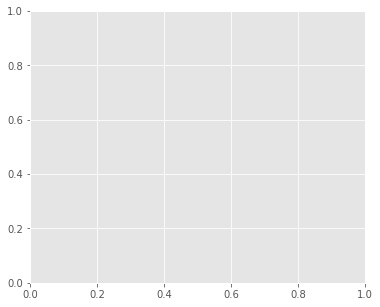

In [48]:
shap.dependence_plot(('particulate_matter_air_pollution_pm25_2010_f24006', "Genotype"), shap_interaction_values, X1.iloc[:2000,:],interaction_index=None)

<Figure size 864x864 with 0 Axes>

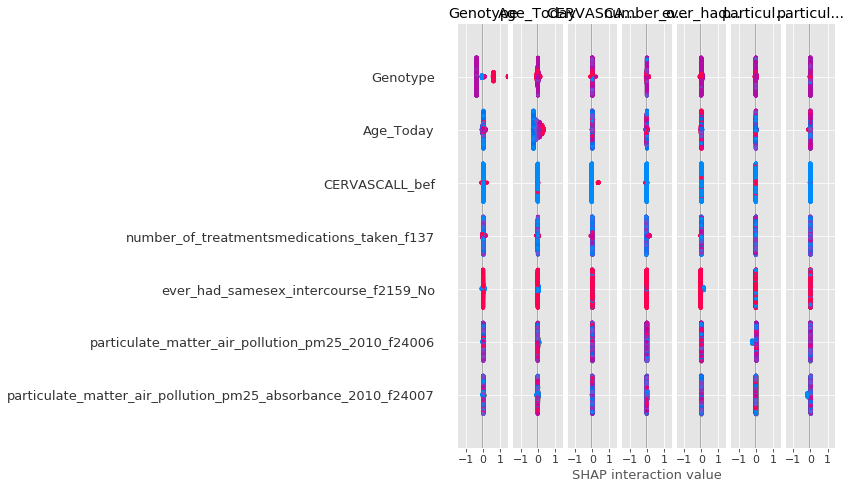

In [35]:
plt.figure(figsize=(12,12))
shap.summary_plot(shap_interaction_values, X1.iloc[:2000,:])

In [28]:
tmp = np.abs(shap_interaction_values).mean(0)
tmp

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0086102 , 0.        ,
        0.00078321],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00078322, 0.        ,
        0.43560284]], dtype=float32)

In [29]:
tmp.shape

(1175, 1175)

In [30]:
shap_interaction_values.shape

(2000, 1175, 1175)

In [31]:
tmp.shape[0]

1175

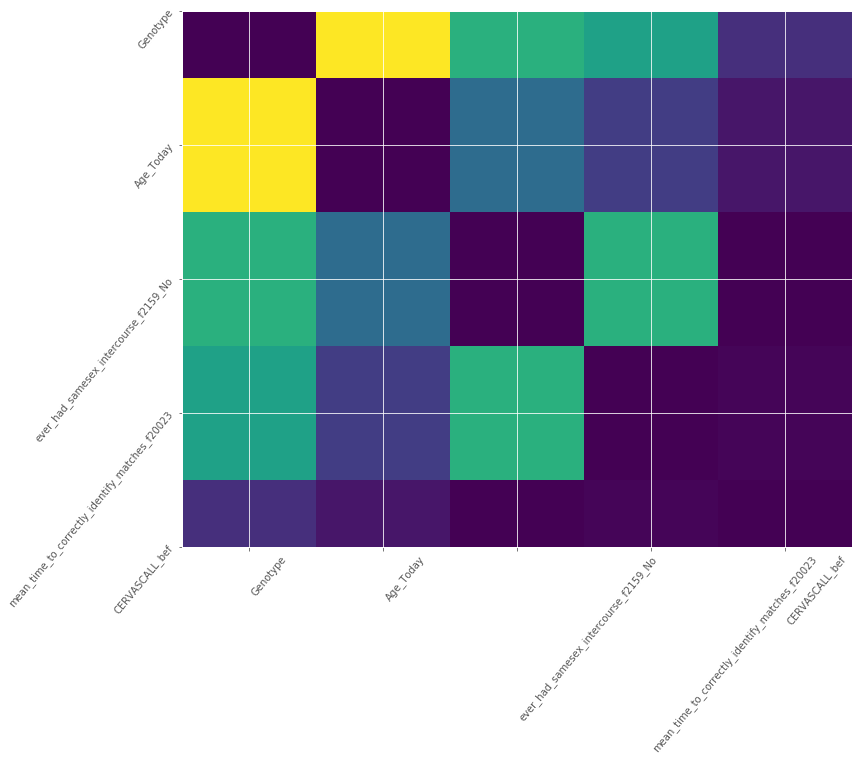

In [33]:
features_set=('Genotype_e3/e4', 'Age_Today')
def pdpplot_3d(df=X,features=features_set,model=mod_xgb):
    fig = plt.figure()
    print(features)

    features = features_set
    pdp, axes = partial_dependence(model, df, features=features,
                                   grid_resolution=20)
    XX, YY = np.meshgrid(axes[0], axes[1])
    Z = pdp[0].T
    ax = Axes3D(fig)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel('Partial dependence')
    #  pretty init view
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.suptitle('Partial dependence of age and genotype')
    plt.subplots_adjust(top=0.9)

    plt.show()
    

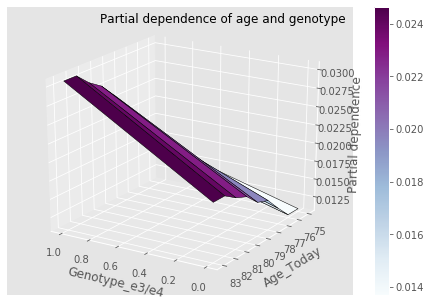

In [109]:
pdpplot_3d()

In [121]:
pdpplot_3d(df=X1,features=('Genotype','Age_Today'))

('Genotype', 'Age_Today')


ValueError: A given column is not a column of the dataframe

<Figure size 432x288 with 0 Axes>

In [13]:
findcols(X,'pollution')

['nitrogen_dioxide_air_pollution_2010_f24003',
 'nitrogen_oxides_air_pollution_2010_f24004',
 'particulate_matter_air_pollution_pm10_2010_f24005',
 'particulate_matter_air_pollution_pm25_2010_f24006',
 'particulate_matter_air_pollution_pm25_absorbance_2010_f24007',
 'particulate_matter_air_pollution_2510um_2010_f24008',
 'nitrogen_dioxide_air_pollution_2005_f24016',
 'nitrogen_dioxide_air_pollution_2006_f24017',
 'nitrogen_dioxide_air_pollution_2007_f24018',
 'particulate_matter_air_pollution_pm10_2007_f24019']

In [32]:
X['sex_f31_Male'].dtype=='uint8'

True

In [34]:

def replacenullsmean(df):
    for col in df.columns:
        nullmask=(df[col].isna())
        df[col][nullmask]=df[col][~nullmask].mean()
    return df

X2=replacenullsmean(X)

In [37]:
from pdpbox import pdp, get_dataset, info_plots
def pdpcontour(df,features,model=mod_xgb):
    inter1 = pdp.pdp_interact(model=mod_xgb, dataset=df, model_features=df.columns,features=features)
    fig, axes = pdp.pdp_interact_plot(\
    pdp_interact_out=inter1, feature_names=features,plot_type='contour', x_quantile=True, plot_pdp=True)

    

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


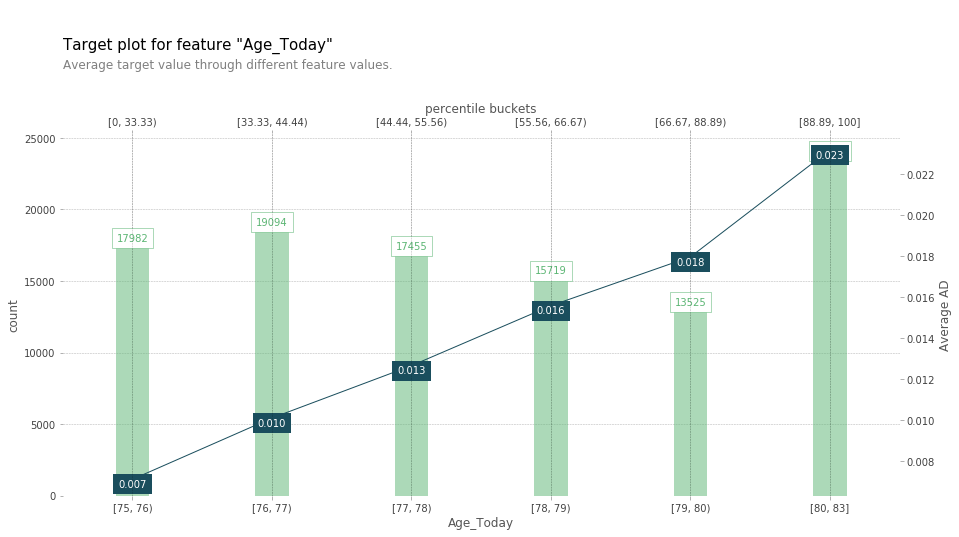

In [50]:
fig, axes, summary_df = info_plots.target_plot(df=X1, feature='Age_Today', feature_name='Age_Today', target='AD', show_percentile=True)


In [67]:
dictlkup['Genotype_e1/e2']

1

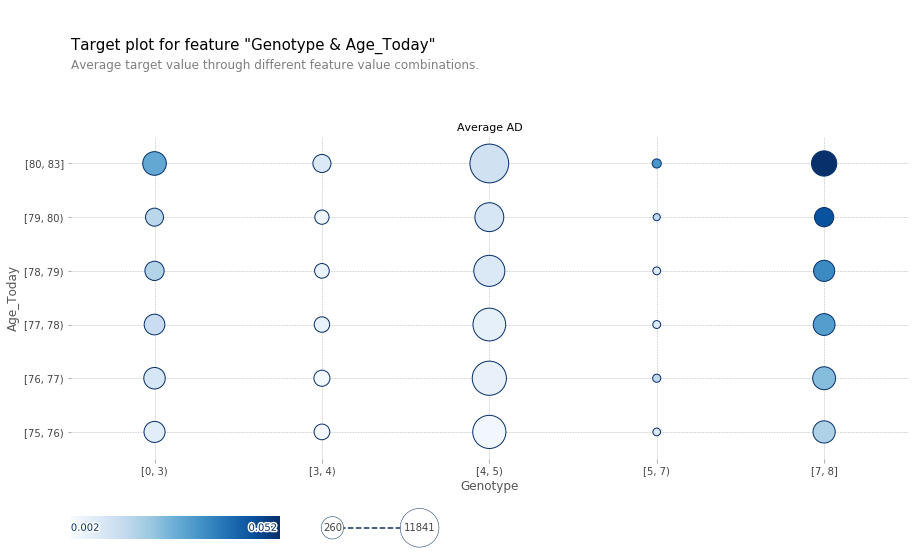

In [74]:
fig, axes, summary_df = info_plots.target_plot_interact(\
df=X1, features=['Genotype', 'Age_Today'], feature_names=['Genotype', 'Age_Today'], target='AD'\
)

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

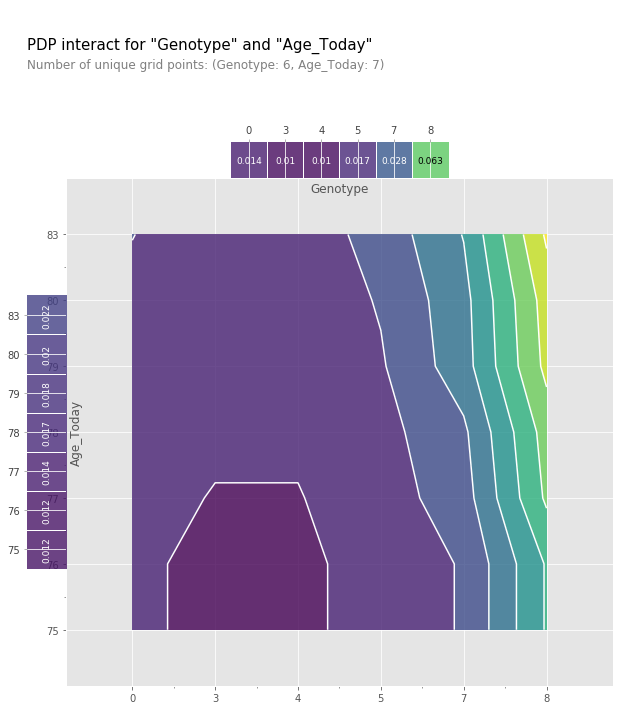

In [122]:
pdpcontour(X1,['Genotype', 'Age_Today'],model=mod_xgb)

In [79]:
pdpcontour(X1,['Genotype', 'particulate_matter_air_pollution_pm25_2010_f24006'],model=mod_xgb)

ValueError: feature_names may not contain [, ] or <

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


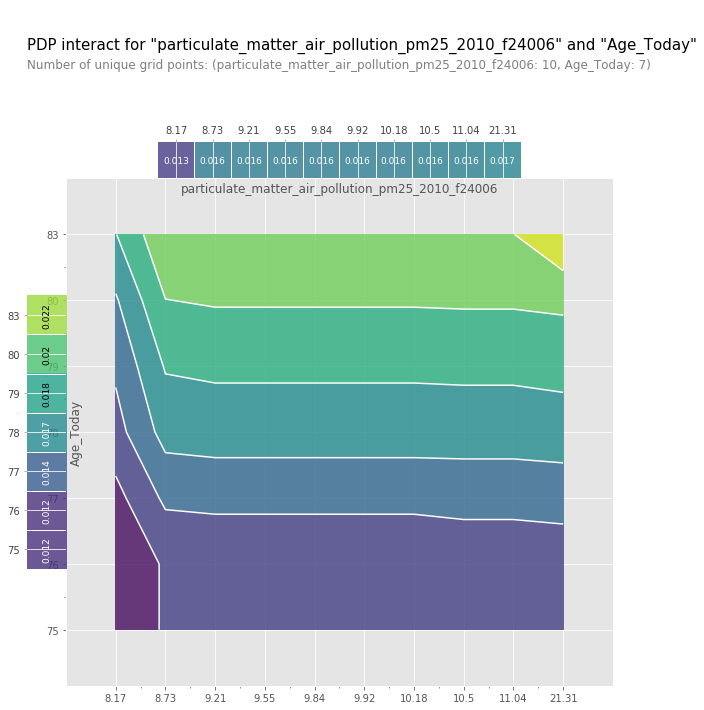

In [36]:


inter1 = pdp.pdp_interact(model=mod_xgb, dataset=X2, model_features=X.columns,features=['particulate_matter_air_pollution_pm25_2010_f24006', 'Age_Today'])
 
fig, axes = pdp.pdp_interact_plot(\
pdp_interact_out=inter1, feature_names=['particulate_matter_air_pollution_pm25_2010_f24006', 'Age_Today'],
                                  plot_type='contour', x_quantile=True, plot_pdp=True)

In [42]:
inter1.describe()

AttributeError: 'PDPInteract' object has no attribute 'describe'